In [1]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt 

types = ['benchmark', 'every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation']
types_dict_ngp_on = {type: {} for type in types}
types_dict_ngp_off = {type: {} for type in types}
types_dict_nerfacto_on = {type: {} for type in types}
types_dict_nerfacto_off = {type: {} for type in types}


path_stump_ngp_on = r'C:\Stuff\Results\metrics\stump_ngp_opt_on_metrics.npy'
path_stump_ngp_off = r'C:\Stuff\Results\metrics\ngp_stump_opt_off_metrics_new.npy'
path_stump_nerfacto_on = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_on_metrics.npy'
path_stump_nerfacto_off = r'C:\Stuff\Results\metrics\nerfacto_stump_opt_off_metrics.npy'

ngp_on = np.load(path_stump_ngp_on, allow_pickle=True).item()
ngp_off = np.load(path_stump_ngp_off, allow_pickle=True).item()
nerfacto_on = np.load(path_stump_nerfacto_on, allow_pickle=True).item()
nerfacto_off = np.load(path_stump_nerfacto_off, allow_pickle=True).item()

for k,v in ngp_on.items():
    for type in types:
        if type in k:
            types_dict_ngp_on[type][k] = v

for k,v in ngp_off.items():
    for type in types:
        if type in k:
            types_dict_ngp_off[type][k] = v

for k,v in nerfacto_on.items():
    if 'stump-orient-std' in k:
        k = k.replace('stump-orient-std', 'stump-orientation-std')
    elif 'stump-pos-std' in k:
        k = k.replace('stump-pos-std', 'stump-position-std')
    for type in types:
        if type in k:
            types_dict_nerfacto_on[type][k] = v

for k,v in nerfacto_off.items():
    for type in types:
        if type in k:
            types_dict_nerfacto_off[type][k] = v                                

benchmark_psnr_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_on = types_dict_ngp_on['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['PSNR']
benchmark_ssim_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['SSIM']
benchmark_lpips_ngp_off = types_dict_ngp_off['benchmark']['stump-benchmark']['LPIPS']

benchmark_psnr_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['PSNR']
benchmark_ssim_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['SSIM']
benchmark_lpips_nerfacto_on = types_dict_nerfacto_on['benchmark']['nerfacto_stump_opt_on_benchmark']['LPIPS']

benchmark_psnr_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['PSNR']
benchmark_ssim_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['SSIM']
benchmark_lpips_nerfacto_off = types_dict_nerfacto_off['benchmark']['nerfacto_stump_opt_off_benchmark']['LPIPS']

benchmarks_psnr = [benchmark_psnr_ngp_on, benchmark_psnr_ngp_off, benchmark_psnr_nerfacto_on, benchmark_psnr_nerfacto_off]
benchmarks_ssim = [benchmark_ssim_ngp_on, benchmark_ssim_ngp_off, benchmark_ssim_nerfacto_on, benchmark_ssim_nerfacto_off]
benchmarks_lpips = [benchmark_lpips_ngp_on, benchmark_lpips_ngp_off, benchmark_lpips_nerfacto_on, benchmark_lpips_nerfacto_off]


In [214]:
for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'
    print(sorted_names)

    psnr_metrics_ngp_on[exp_name_joined] =  sorted_psnrs
    ssim_metrics_ngp_on[exp_name_joined] =  sorted_ssims
    lpips_metrics_ngp_on[exp_name_joined] =  sorted_lpips

['benchmark']
['2', '3', '4', '5', '6', '7', '8']
['5', '10', '15', '20', '25', '30', '35', '40']
['16', '32', '48', '64', '80', '96', '112', '128']
['0.005', '0.01', '0.015', '0.02', '0.025', '0.03', '0.035', '0.04', '0.045', '0.05', '0.0525', '0.055', '0.0575', '0.06']
['5', '10', '15', '20', '25', '30', '35', '40']
['5', '10', '15', '20', '25', '30', '35', '40']
['5', '10', '15', '20', '25', '30', '35', '40']
['0.005', '0.01', '0.015', '0.02', '0.025', '0.03', '0.035', '0.04', '0.045', '0.05', '0.0525', '0.055', '0.0575', '0.06']
['0.005', '0.01', '0.015', '0.02', '0.025', '0.03', '0.035', '0.04', '0.045', '0.05', '0.0525', '0.055', '0.0575', '0.06']
['10', '20', '30', '40', '50', '60', '70', '80', '90', '100']
['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']


In [211]:
psnr_metrics_ngp_on = {}
psnr_metrics_ngp_off = {}
psnr_metrics_nerfacto_on = {}
psnr_metrics_nerfacto_off = {}

ssim_metrics_ngp_on = {}
ssim_metrics_ngp_off = {}
ssim_metrics_nerfacto_on = {}
ssim_metrics_nerfacto_off = {}

lpips_metrics_ngp_on = {}
lpips_metrics_ngp_off = {}
lpips_metrics_nerfacto_on = {}
lpips_metrics_nerfacto_off = {}

for type, metrics in types_dict_ngp_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    psnr_metrics_ngp_on[exp_name_joined] =  sorted_psnrs
    ssim_metrics_ngp_on[exp_name_joined] =  sorted_ssims
    lpips_metrics_ngp_on[exp_name_joined] =  sorted_lpips



for type, metrics in types_dict_ngp_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    if exp_name_joined == 'stump-saturation-std':
        print(len(sorted_psnrs))
        print(sorted_names)
    psnr_metrics_ngp_off[exp_name_joined] =  sorted_psnrs
    ssim_metrics_ngp_off[exp_name_joined] =  sorted_ssims
    lpips_metrics_ngp_off[exp_name_joined] =  sorted_lpips

for type, metrics in types_dict_nerfacto_on.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    psnr_metrics_nerfacto_on[exp_name_joined] =  sorted_psnrs
    ssim_metrics_nerfacto_on[exp_name_joined] =  sorted_ssims
    lpips_metrics_nerfacto_on[exp_name_joined] =  sorted_lpips


for type, metrics in types_dict_nerfacto_off.items():
    psnrs = [v['PSNR'] for k,v in metrics.items()]
    ssims = [v['SSIM'] for k,v in metrics.items()]
    lpips = [v['LPIPS'] for k,v in metrics.items()]
    names = [k for k,v in metrics.items()]   
    if len(names) > 1:
        sorted_names = sorted(names, key=lambda x: int(x.split('-')[-1].split('.')[0]))
        sorted_psnrs = [psnrs[names.index(name)] for name in sorted_names]
        sorted_lpips = [lpips[names.index(name)] for name in sorted_names]
        sorted_ssims = [ssims[names.index(name)] for name in sorted_names]
        exp_name = [name.split('-')[:] for name in sorted_names]
        exp_name_joined = ['-'.join(elements[:-1]) for elements in exp_name][0]
        
        sorted_names = [name.split('-')[-1] for name in sorted_names]
    else:
        sorted_names = names
        sorted_names = [name.split('-')[-1] for name in sorted_names]
        sorted_psnrs = psnrs
        sorted_lpips = lpips
        sorted_ssims = ssims

        exp_name_joined = 'benchmark'

    psnr_metrics_nerfacto_off[exp_name_joined] =  sorted_psnrs
    ssim_metrics_nerfacto_off[exp_name_joined] =  sorted_ssims
    lpips_metrics_nerfacto_off[exp_name_joined] =  sorted_lpips


10
['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']


In [220]:
xticks = {}
for key in types_dict_nerfacto_off.keys():
    
    # print(types_dict_nerfacto_off[key].keys())  
    if key != 'benchmark':
        keys2 = list(types_dict_nerfacto_off[key].keys())
        values = sorted([float(key.split('-')[-1]) for key in keys2])
        values = ['orig'] + values
        # key.replace('stump-', '')
        # key.replace('-std', '')
        xticks[key] = values
        # print(keys2[0])
        # if type(keys2[0]) is float:
        #     xticks[key] = [float(key.split('-')[-1]) for key in keys2]
        # else:
        #     xticks[key] = [float(key.split('-')[-1]) for key in keys2]
        print(xticks[key])


['orig', 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
['orig', 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
['orig', 16.0, 32.0, 48.0, 64.0, 80.0, 96.0, 112.0, 128.0]
['orig', 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
['orig', 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
['orig', 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
['orig', 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0]
['orig', 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
['orig', 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.0525, 0.055, 0.0575, 0.06]
['orig', 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
['orig', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [184]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Simulating some data for demonstration
# np.random.seed(0)  # For reproducibility

# # Assume each key has 5 lists of values, we simulate these values for 4 dictionaries
# dict1 = {
#     'benchmark': [np.random.normal(25, 5, 100) for _ in range(5)],
#     'stump-every': [np.random.normal(30, 6, 100) for _ in range(5)],
#     'stump-gamma': [np.random.normal(28, 4, 100) for _ in range(5)]
# }

# dict2 = {
#     'benchmark': [np.random.normal(26, 5, 100) for _ in range(5)],
#     'stump-every': [np.random.normal(31, 6, 100) for _ in range(5)],
#     'stump-gamma': [np.random.normal(29, 4, 100) for _ in range(5)]
# }

# dict3 = {
#     'benchmark': [np.random.normal(27, 5, 100) for _ in range(5)],
#     'stump-every': [np.random.normal(32, 6, 100) for _ in range(5)],
#     'stump-gamma': [np.random.normal(30, 4, 100) for _ in range(5)]
# }

# dict4 = {
#     'benchmark': [np.random.normal(28, 5, 100) for _ in range(5)],
#     'stump-every': [np.random.normal(33, 6, 100) for _ in range(5)],
#     'stump-gamma': [np.random.normal(31, 4, 100) for _ in range(5)]
# }

# # Consolidating data for plotting
# keys = dict1.keys()
# data_to_plot = {key: [] for key in keys}
# for key in keys:
#     for i in range(5):  # Assuming each key has 5 lists of values
#         data_to_plot[key].append([
#             dict1[key][i], 
#             dict2[key][i], 
#             dict3[key][i], 
#             dict4[key][i]
#         ])

# # Plotting
# fig, axs = plt.subplots(len(keys), 1, figsize=(10, 6), sharey=True)

# for i, key in enumerate(keys):
#     # Flattening the list of lists for each dictionary and creating positions for each boxplot
#     data_flattened = [item for sublist in data_to_plot[key] for item in sublist]
#     positions = [1 + 5 * x for x in range(len(data_to_plot[key]))] + \
#                 [2 + 5 * x for x in range(len(data_to_plot[key]))] + \
#                 [3 + 5 * x for x in range(len(data_to_plot[key]))] + \
#                 [4 + 5 * x for x in range(len(data_to_plot[key]))]
    
#     axs[i].boxplot(data_flattened, positions=positions)
#     axs[i].set_title(key)
#     axs[i].set_xticks([2.5 + 5 * x for x in range(len(data_to_plot[key]))])
#     axs[i].set_xticklabels(['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5'])
#     # axs[i].grid(True)

# plt.tight_layout()
# plt.show()  


In [145]:
# import matplotlib.pyplot as plt

# psnr_metrics_ngp_on
# psnr_metrics_ngp_off
# psnr_metrics_nerfacto_on
# psnr_metrics_nerfacto_off

# keys = psnr_metrics_nerfacto_off.keys()
# data_to_plot = {key: [] for key in keys}
# for key in keys:
#     for i in range(len(psnr_metrics_ngp_off[key])):  # Assuming each key has 5 lists of values
#         data_to_plot[key].append([
#             psnr_metrics_ngp_on[key][i], 
#             psnr_metrics_ngp_off[key][i], 
#             psnr_metrics_nerfacto_on[key][i], 
#             psnr_metrics_nerfacto_off[key][i]
#         ])

# for key in keys:
#     # Flattening the list of lists for each dictionary and creating positions for each boxplot
#     data_flattened = [item for sublist in data_to_plot[key] for item in sublist]
#     positions = [1 + len(data_to_plot[key]) * x for x in range(len(data_to_plot[key]))] + \
#                 [2 + len(data_to_plot[key]) * x for x in range(len(data_to_plot[key]))] + \
#                 [3 + len(data_to_plot[key]) * x for x in range(len(data_to_plot[key]))] + \
#                 [4 + len(data_to_plot[key]) * x for x in range(len(data_to_plot[key]))]
    
#     # Create a new figure for each key
#     plt.figure(figsize=(len(data_to_plot[key])*2, 2))
#     plt.boxplot(data_flattened, positions=positions)
#     plt.title(key)
#     # plt.xticks([2.5 + 5 * x for x in range(len(data_to_plot[key]))], 
#             #    ['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5'])
#     plt.xticks([2.5 + len(data_to_plot[key]) * x for x in range(len(data_to_plot[key]))], 
#                range(len(data_to_plot[key])))
#     # plt.grid(True)
    
#     plt.tight_layout()
#     plt.show()


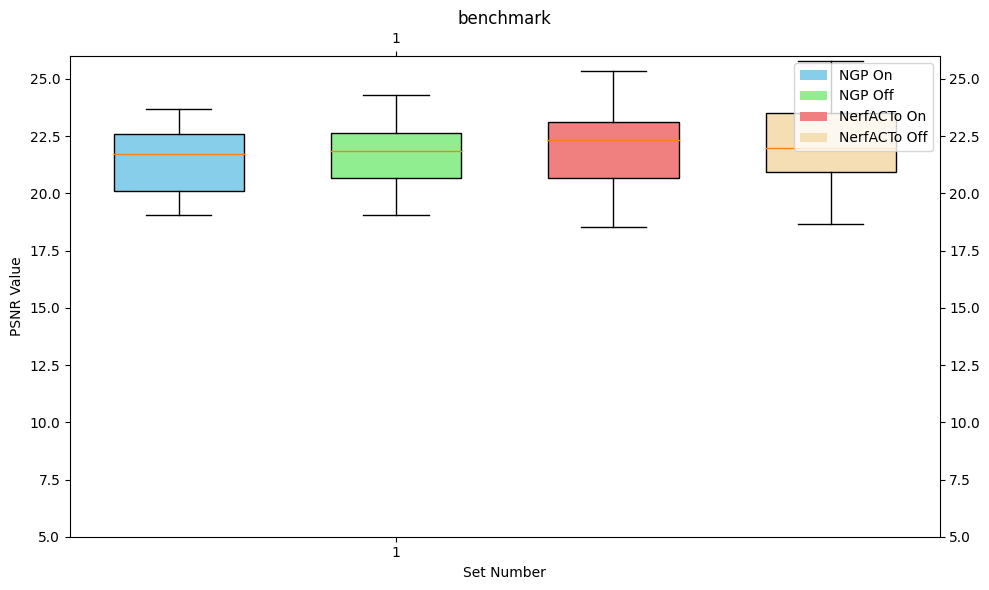

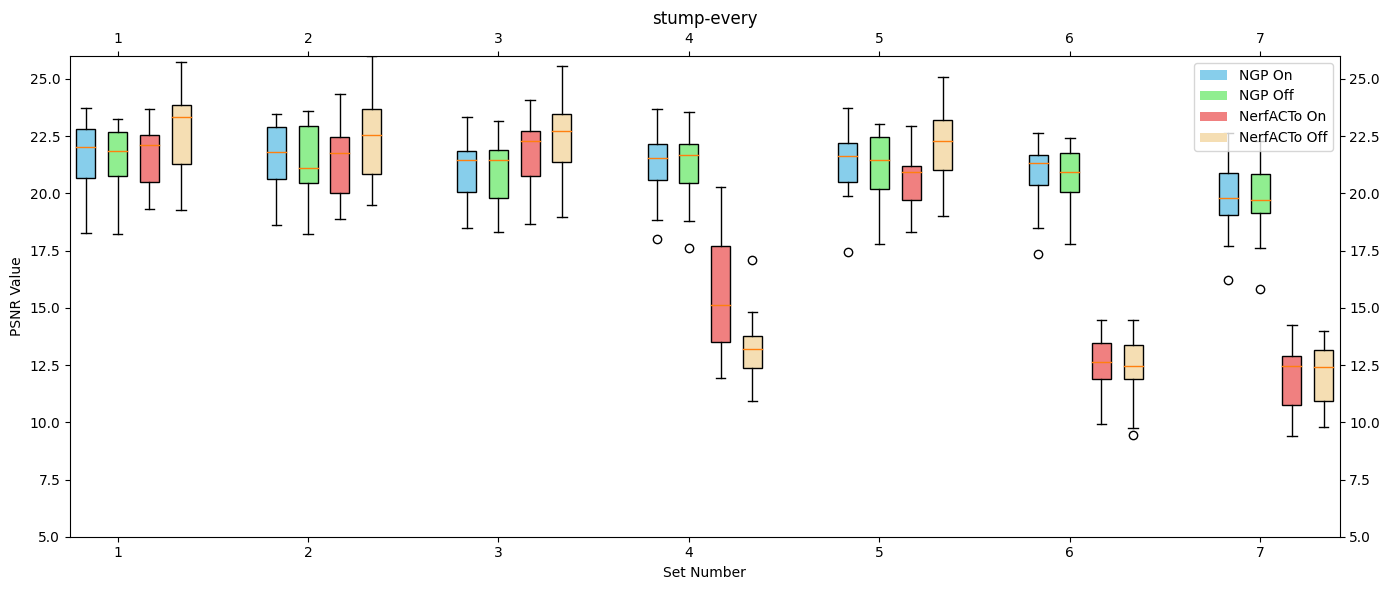

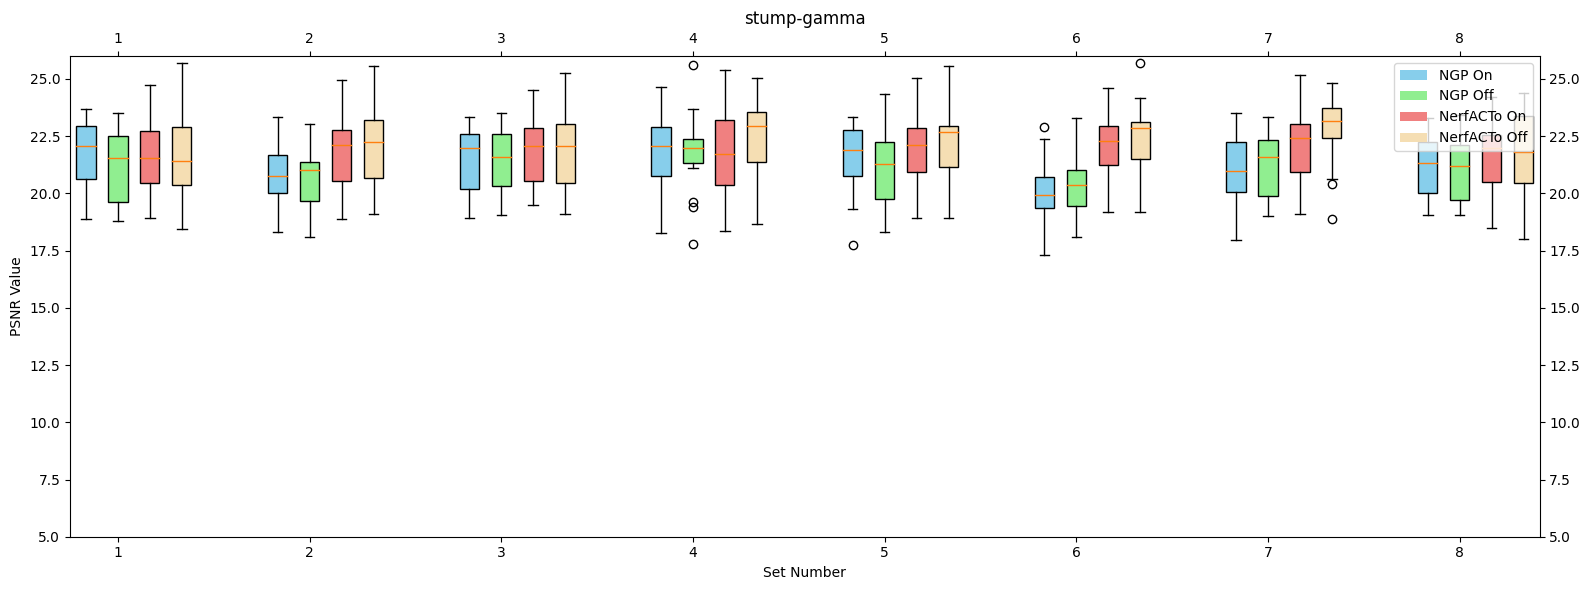

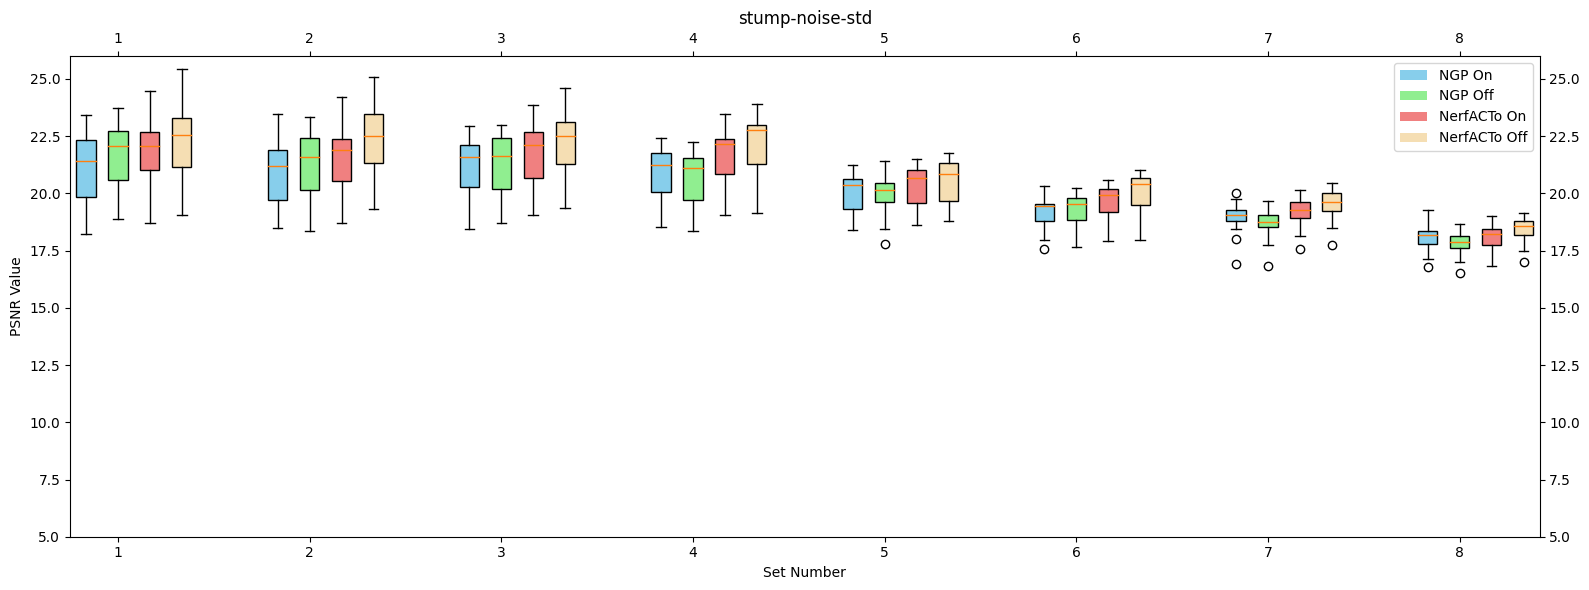

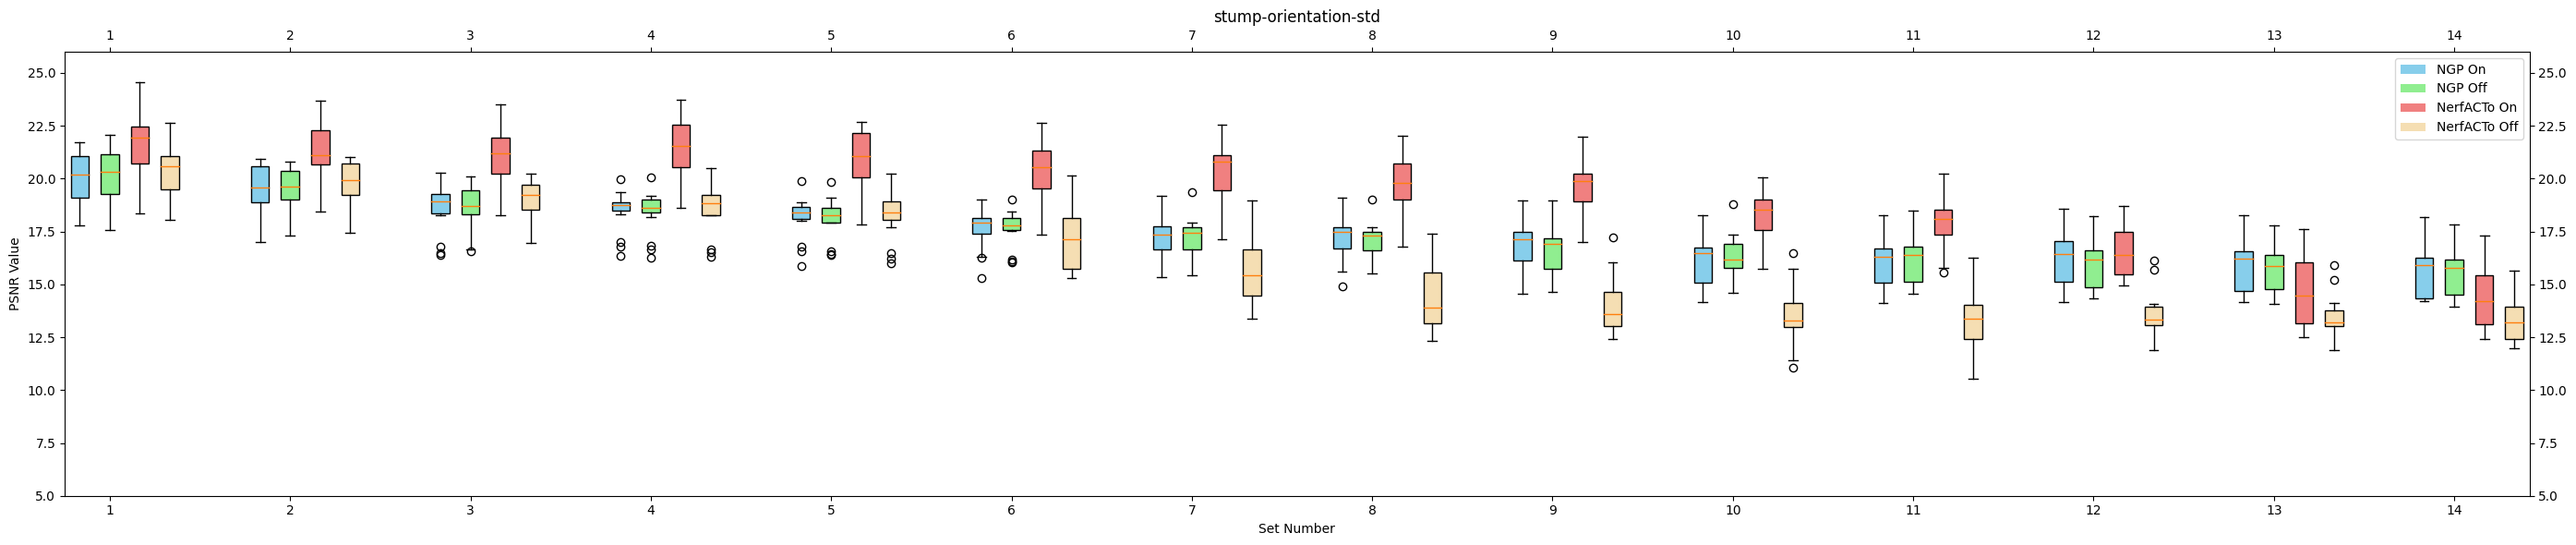

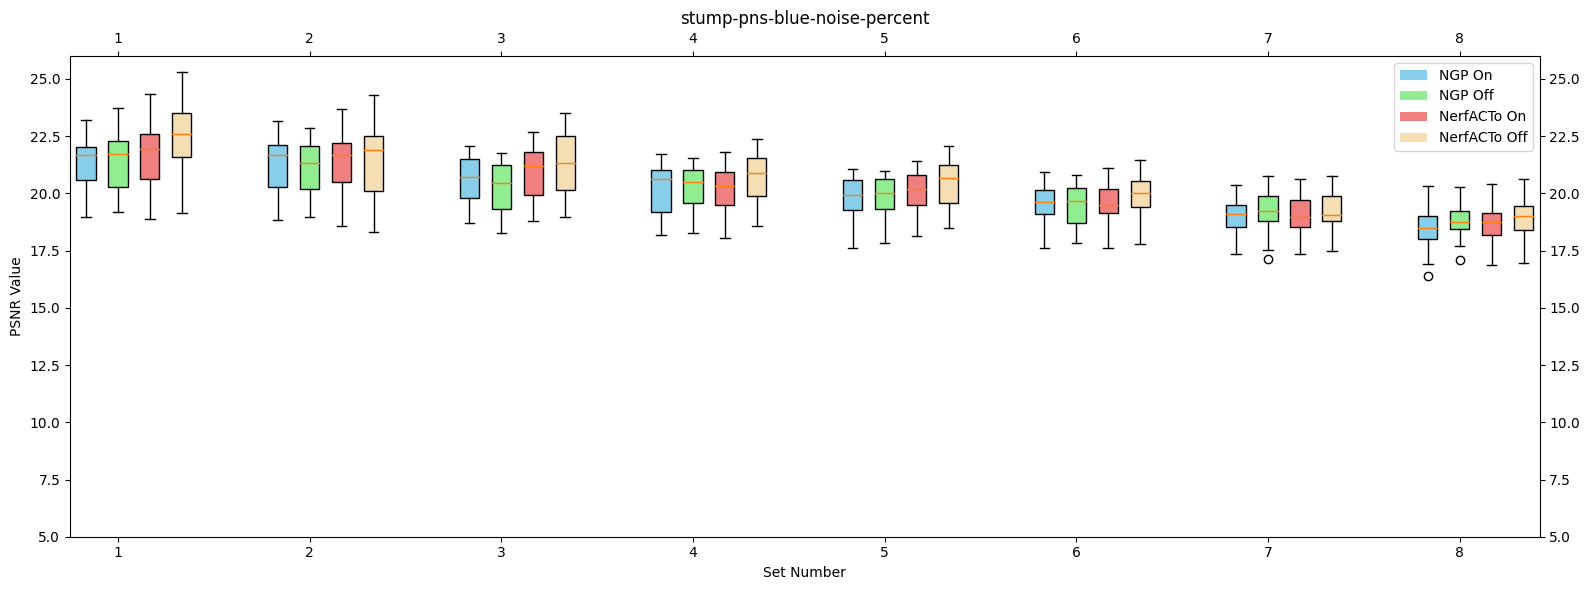

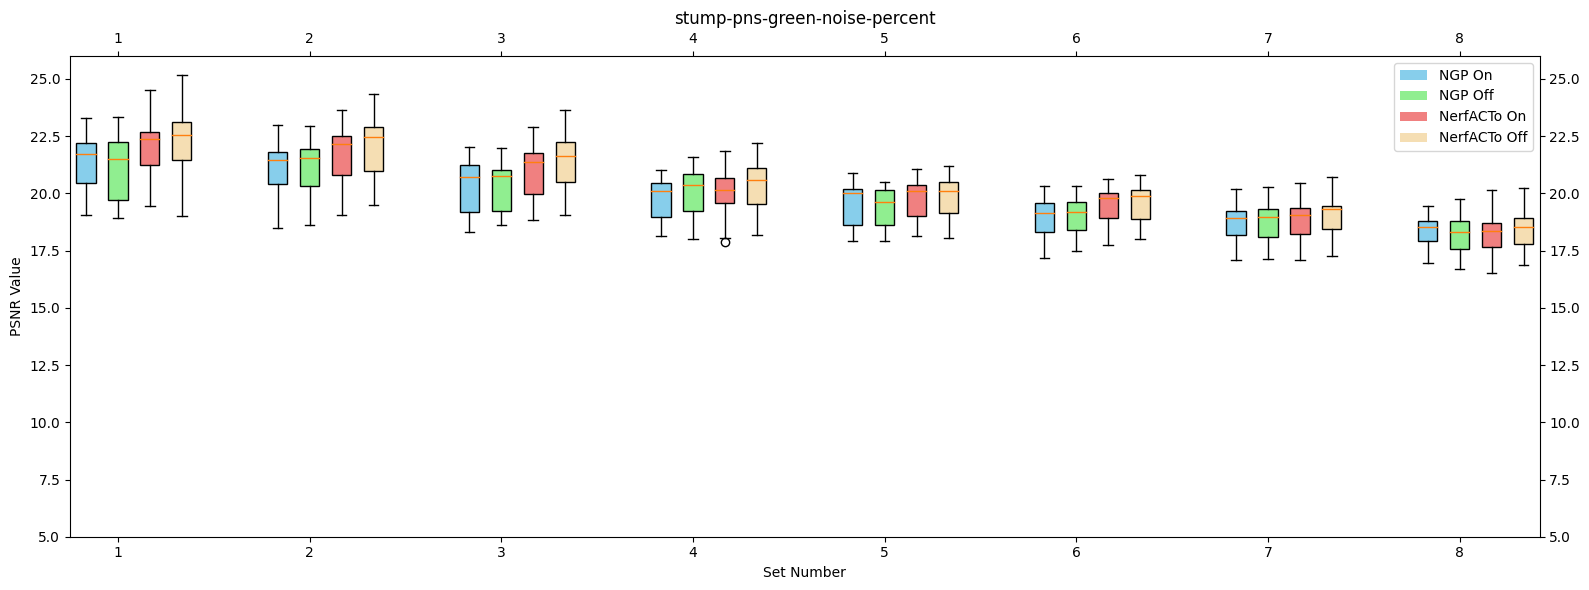

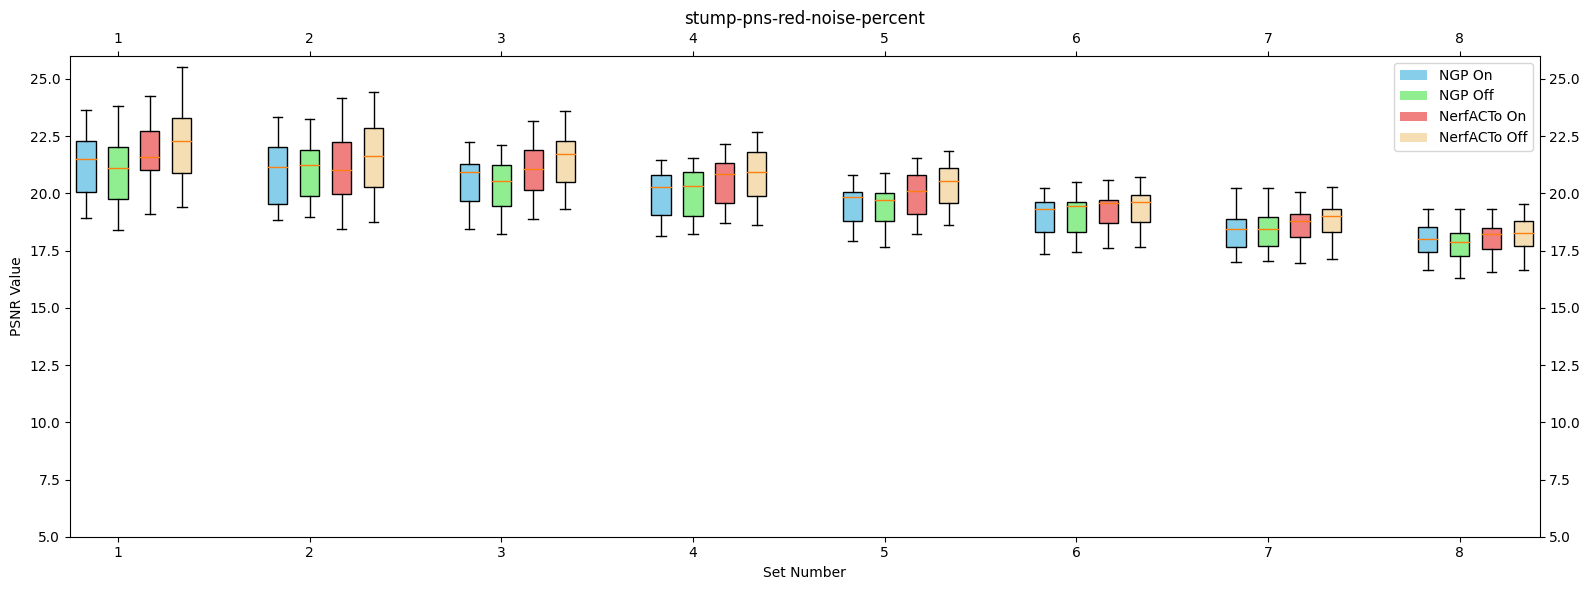

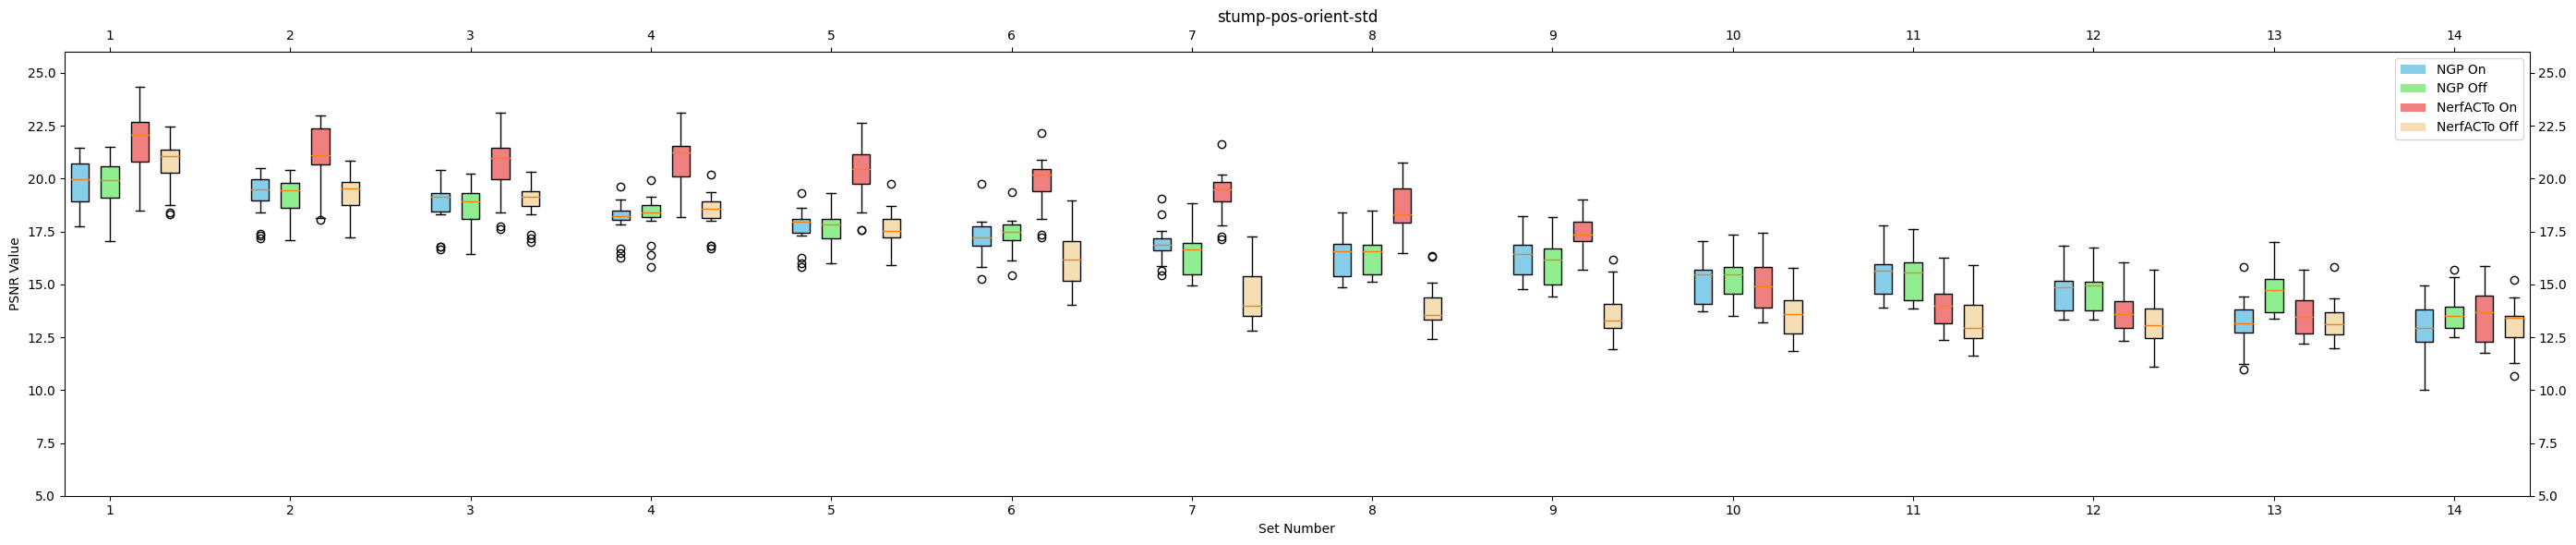

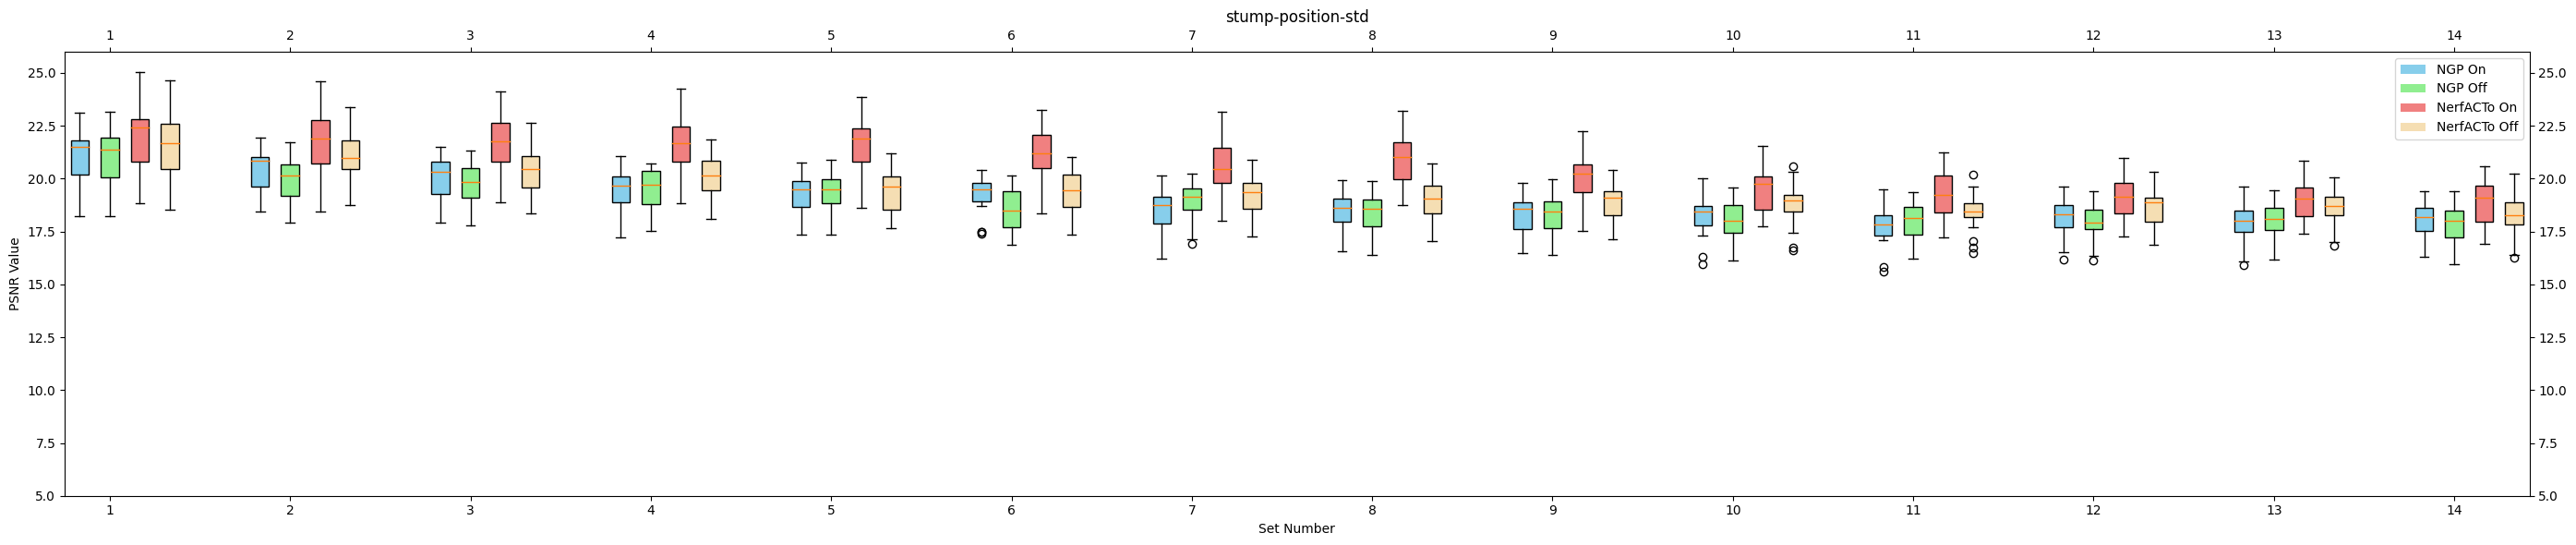

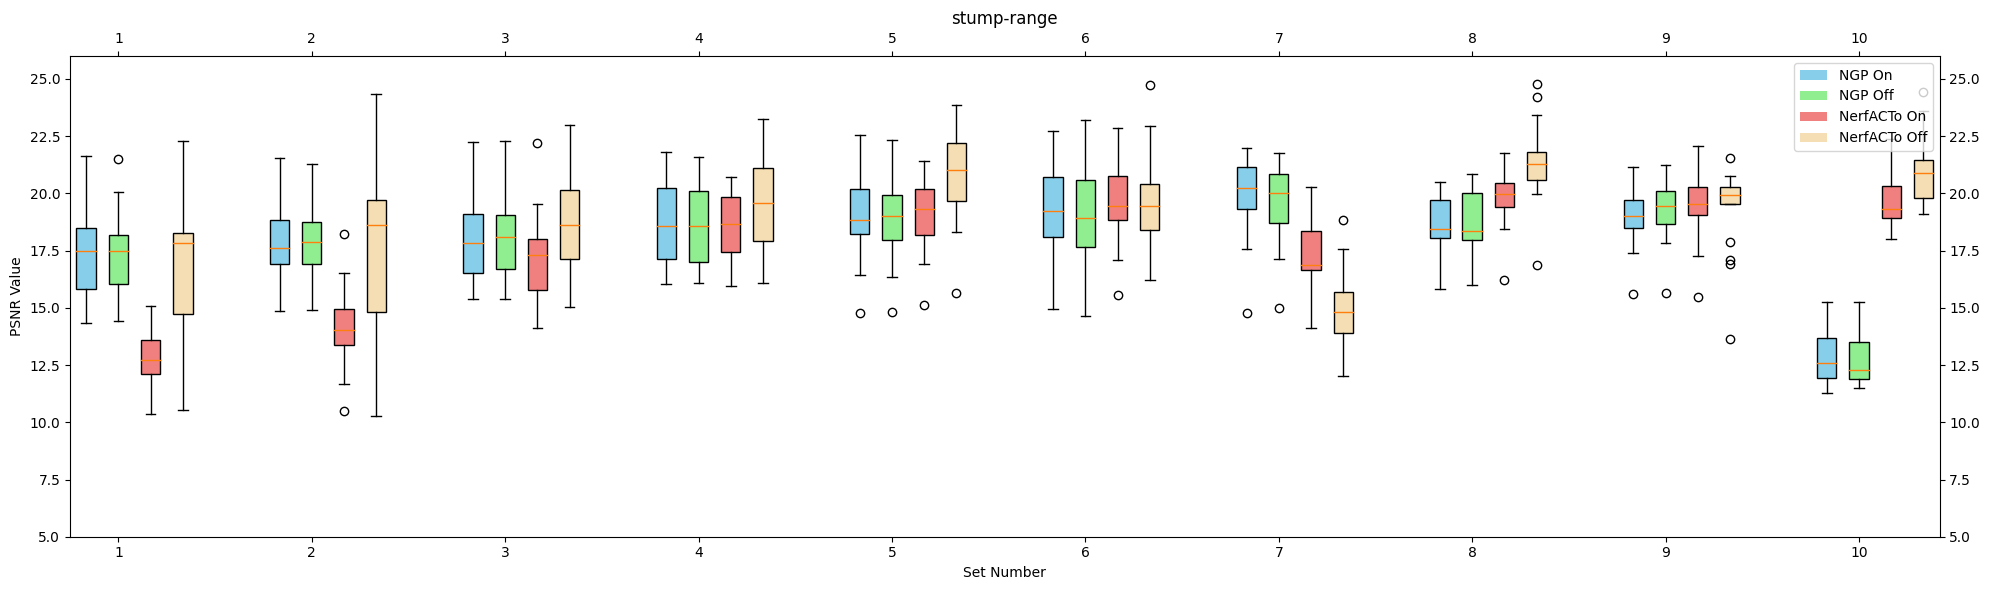

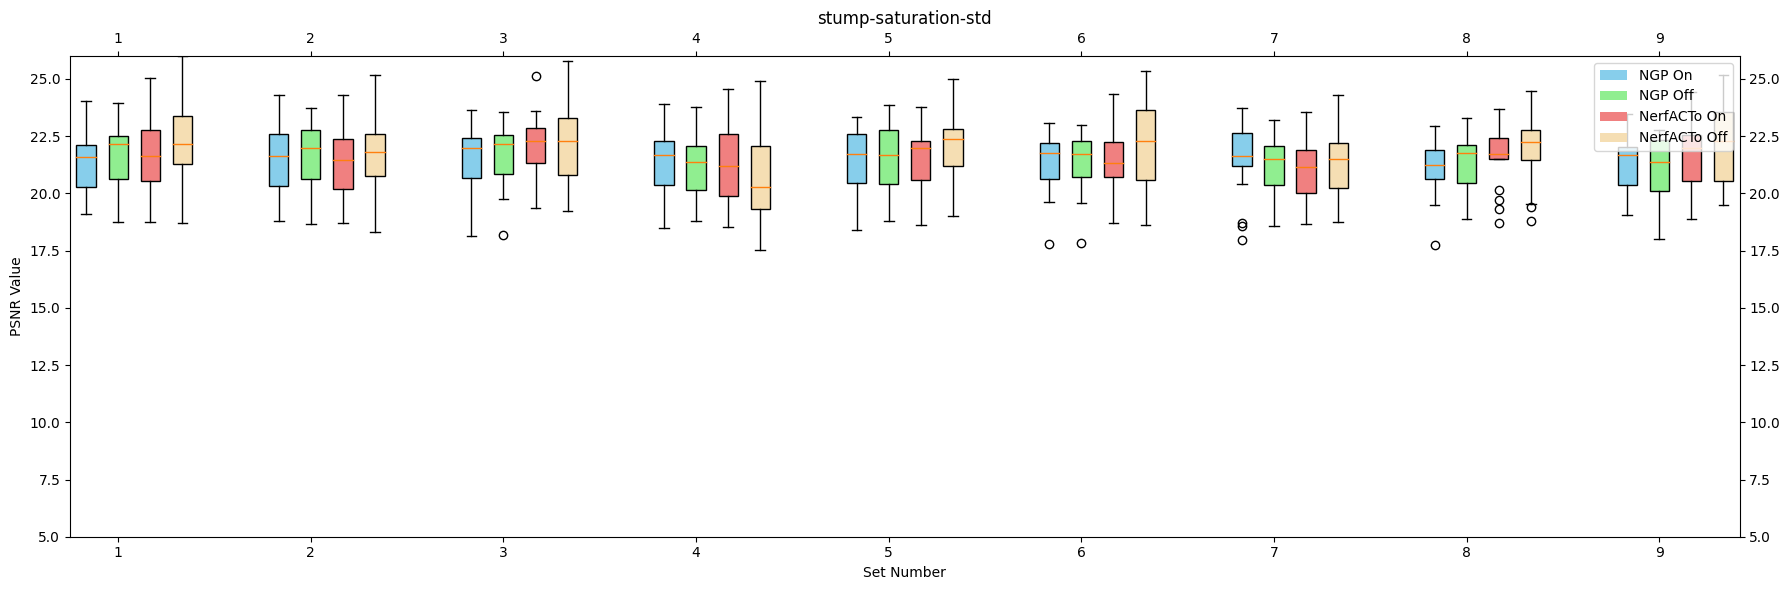

In [81]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming your data initialization code here

keys = psnr_metrics_nerfacto_off.keys()
data_to_plot = {key: [] for key in keys}
for key in keys:
    for i in range(len(psnr_metrics_ngp_off[key])):
        data_to_plot[key].append([
            psnr_metrics_ngp_on[key][i], 
            psnr_metrics_ngp_off[key][i], 
            psnr_metrics_nerfacto_on[key][i], 
            psnr_metrics_nerfacto_off[key][i]
        ])

data_groups = 4
gap_between_groups = 2
colors = ['skyblue', 'lightgreen', 'lightcoral', 'wheat']  # Colors for each boxplot group
group_labels = ['NGP On', 'NGP Off', 'NerfACTo On', 'NerfACTo Off']  # Legend labels

for key in keys:
    num_sets = len(data_to_plot[key])
    positions = []
    for set_index in range(num_sets):
        for group_index in range(data_groups):
            position = (set_index * (data_groups + gap_between_groups)) + group_index + 1
            positions.append(position)

    plt.figure(figsize=(max(10, num_sets * 2), 6))
    
    # Creating boxplots with colors
    bp = plt.boxplot([item for sublist in data_to_plot[key] for item in sublist], 
                     positions=positions, widths=0.6, patch_artist=True)
    
    for patch, color in zip(bp['boxes'], colors * num_sets):
        patch.set_facecolor(color)
    
    plt.title(key)
    xticks_positions = [(set_index * (data_groups + gap_between_groups)) + (data_groups / 2) 
                        for set_index in range(num_sets)]
    plt.xticks(xticks_positions, range(1, num_sets + 1))
    plt.xlabel('Set Number')
    plt.ylabel('PSNR Value')

    # Adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    plt.legend(handles=legend_elements, loc='upper right')
    
    # Adding ticks on top and right
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)

        # Setting y-axis limits to vmin and vmax
    vmin, vmax = 5, 26  # Adjust these values as needed for your data
    ax.set_ylim([vmin, vmax])
    
    plt.tight_layout()
    plt.show()


0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10


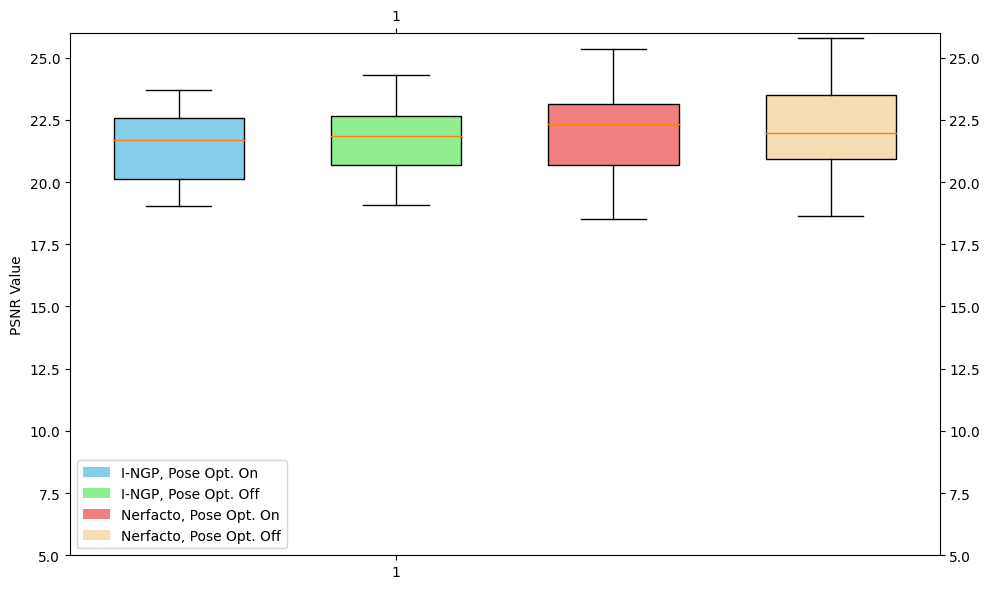

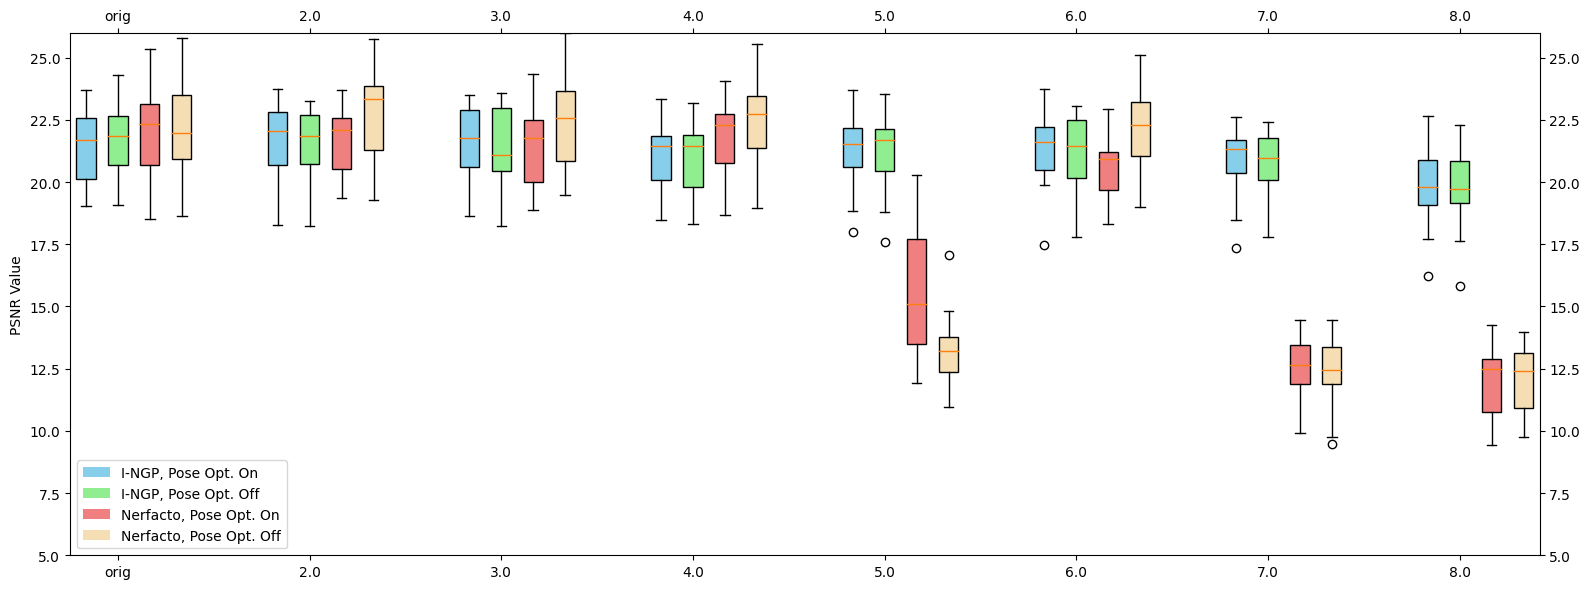

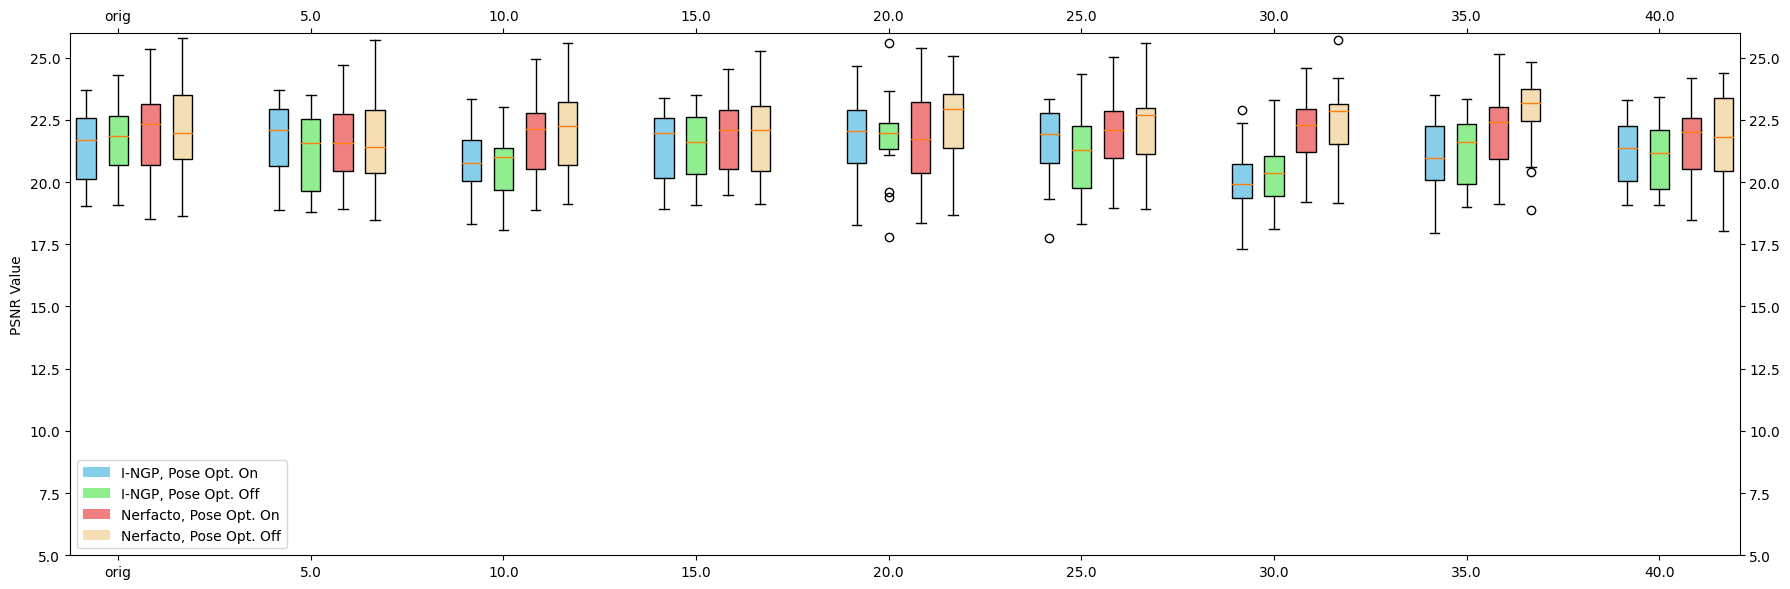

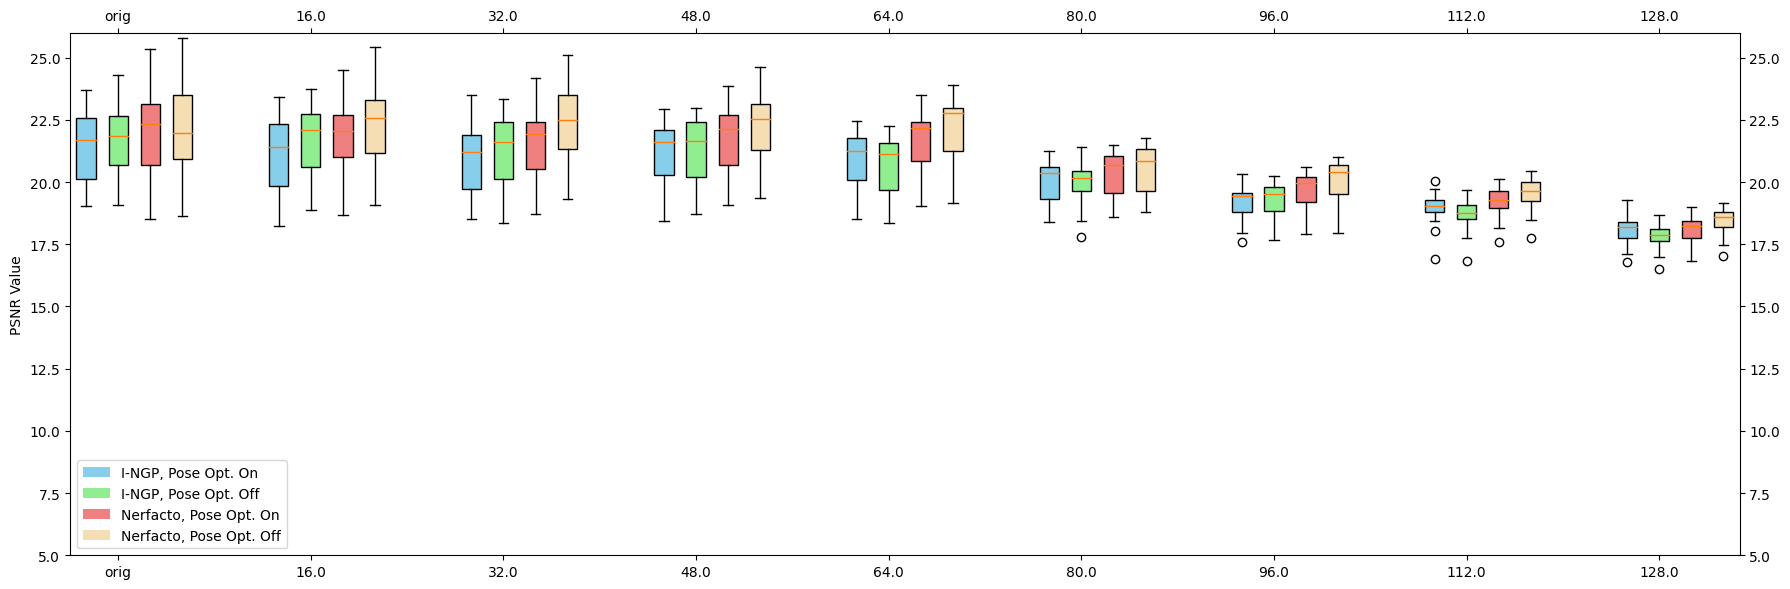

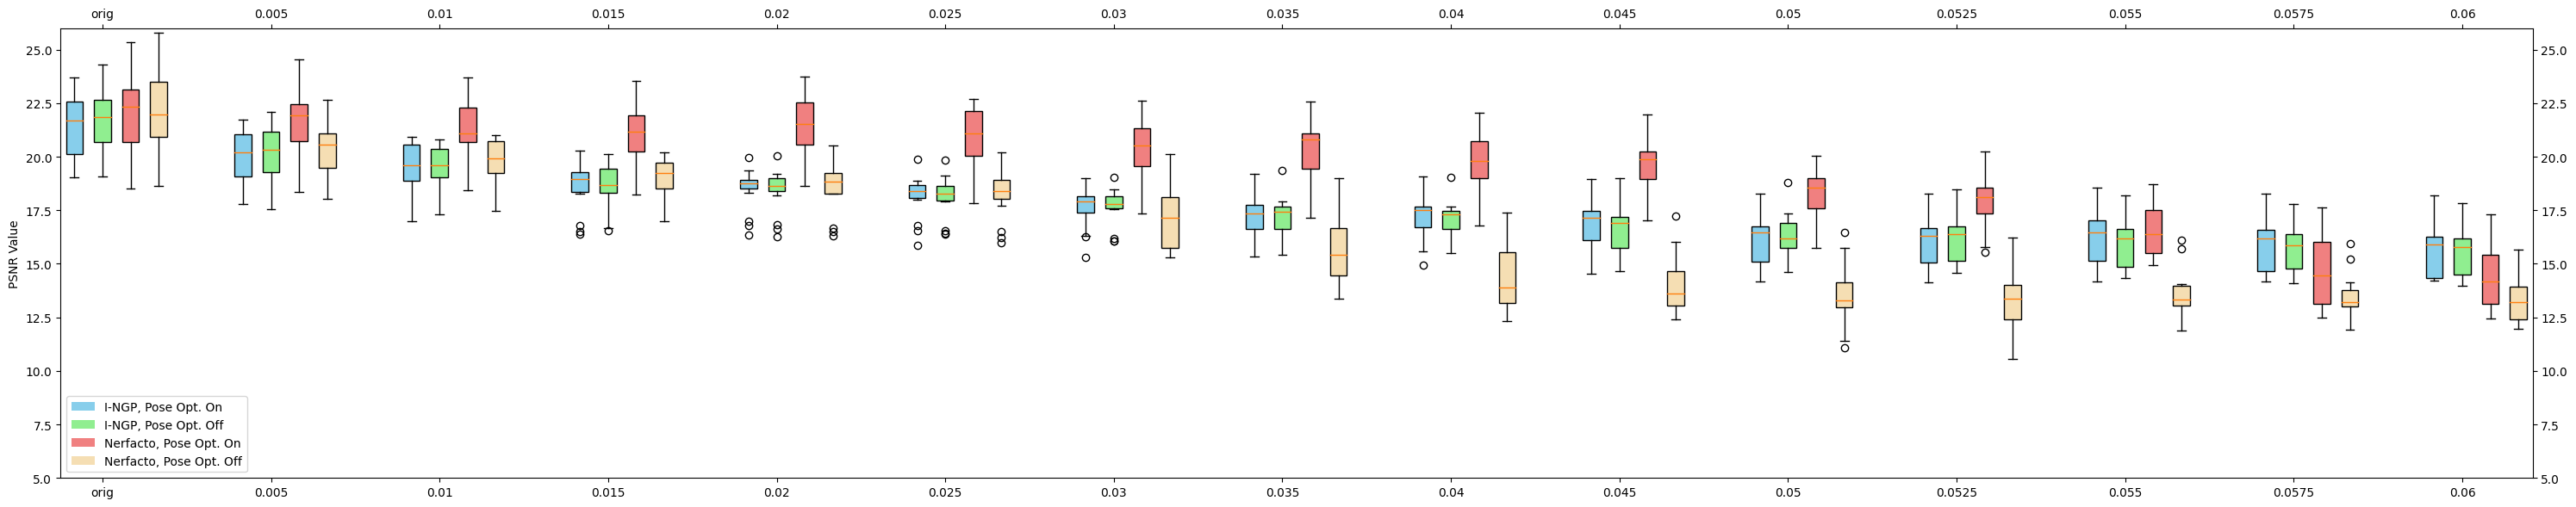

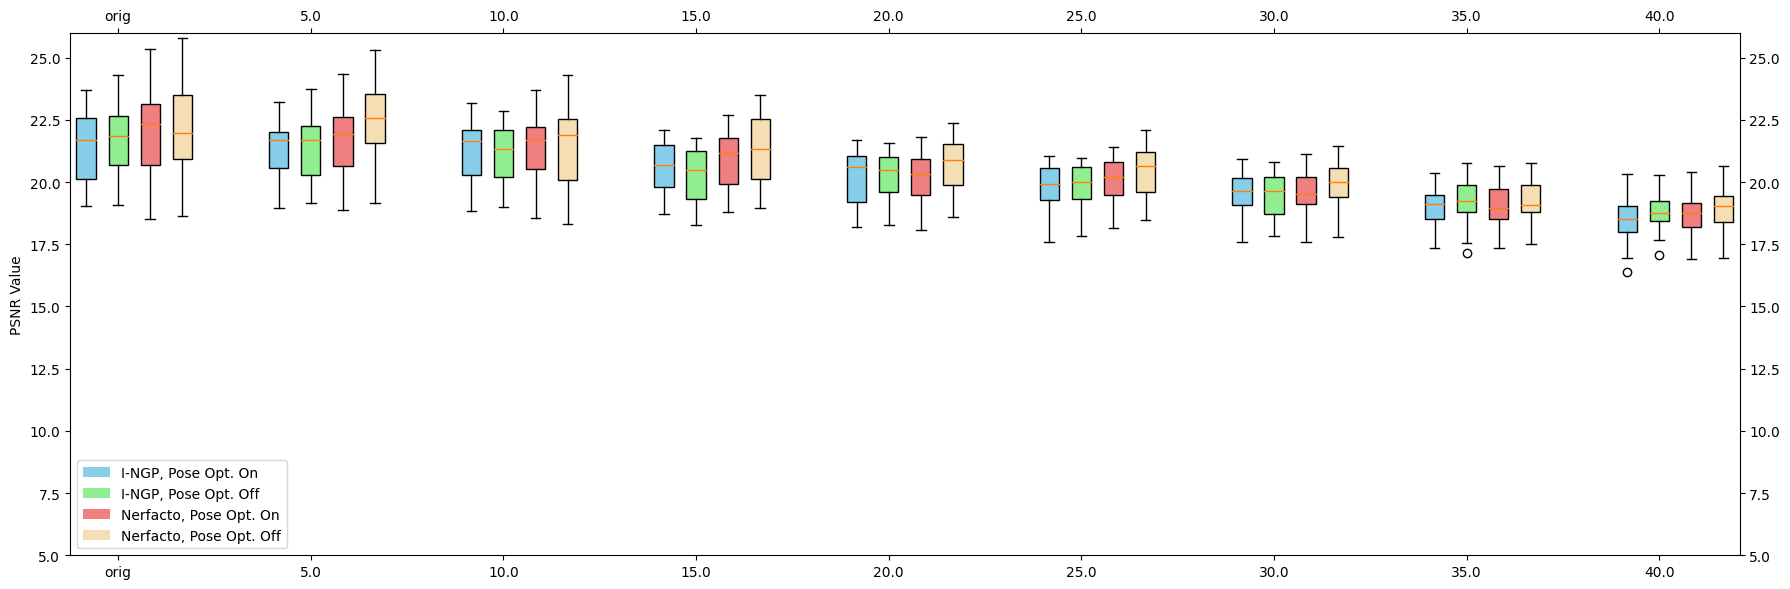

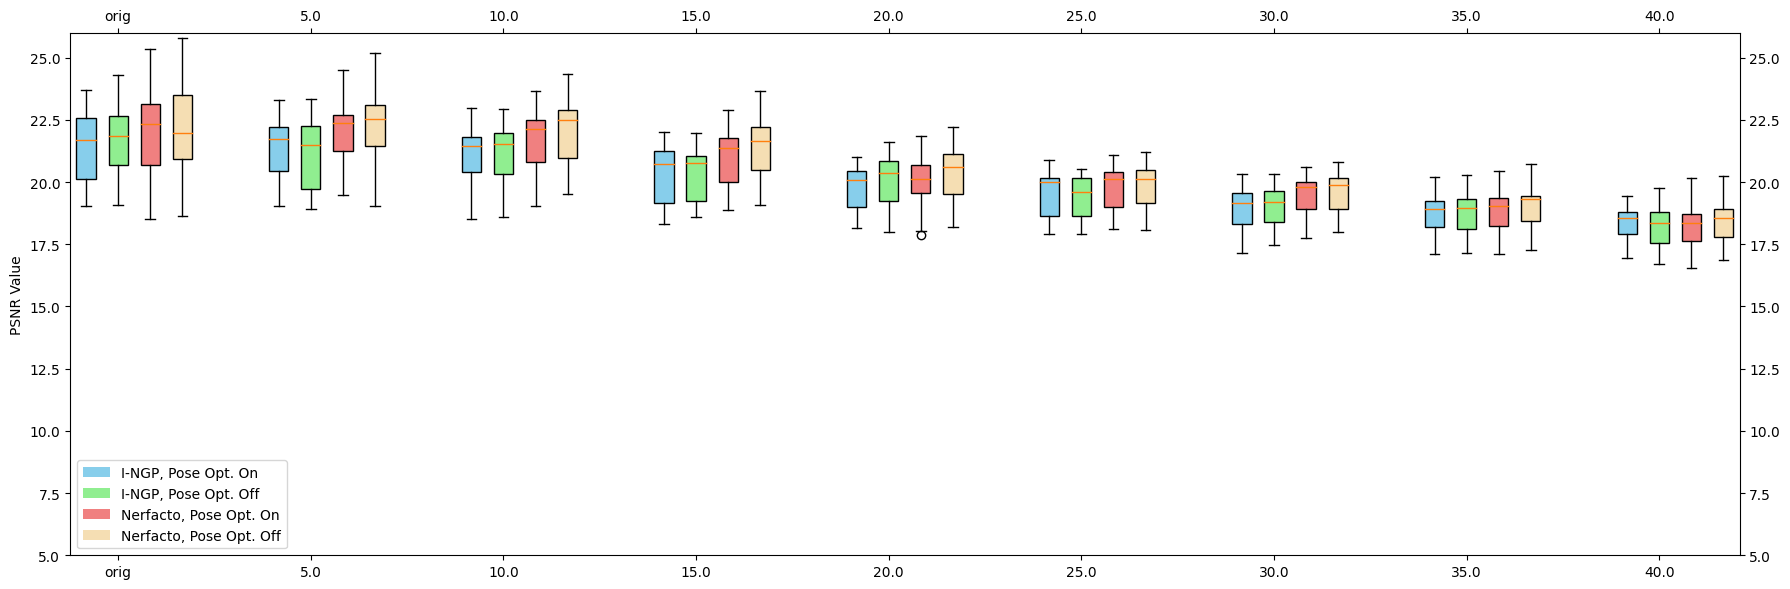

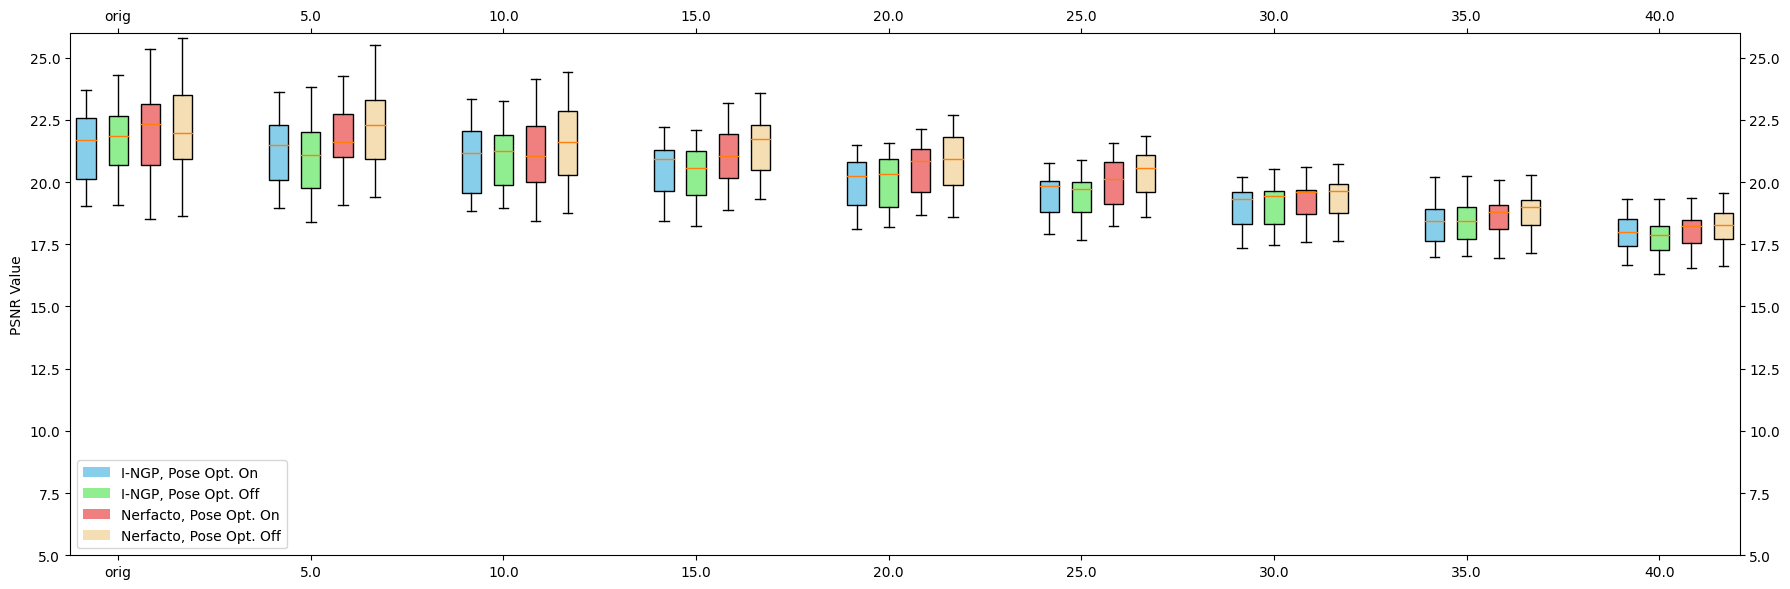

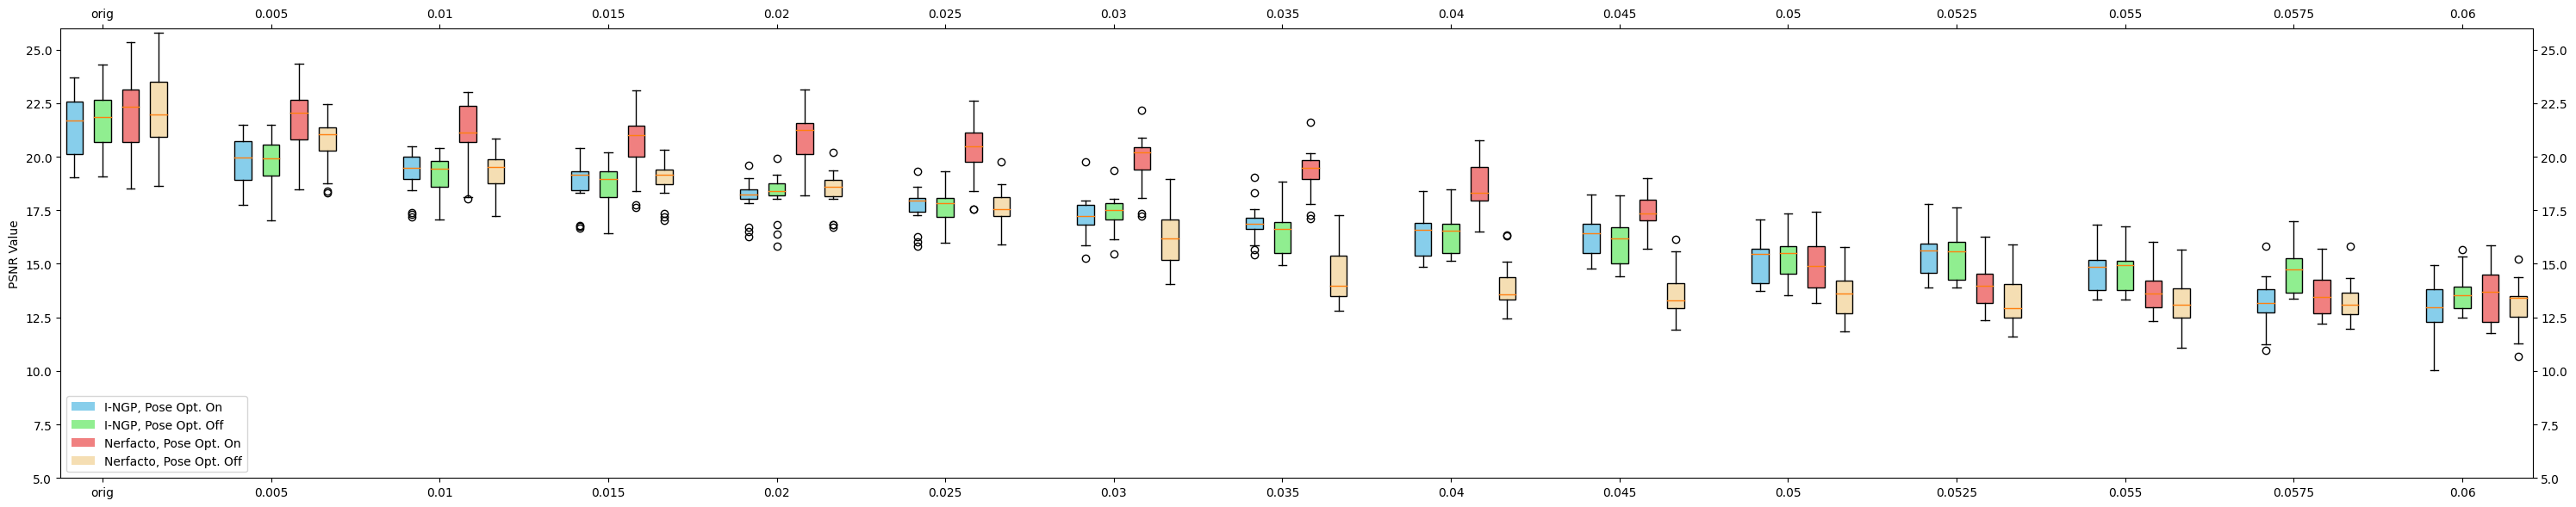

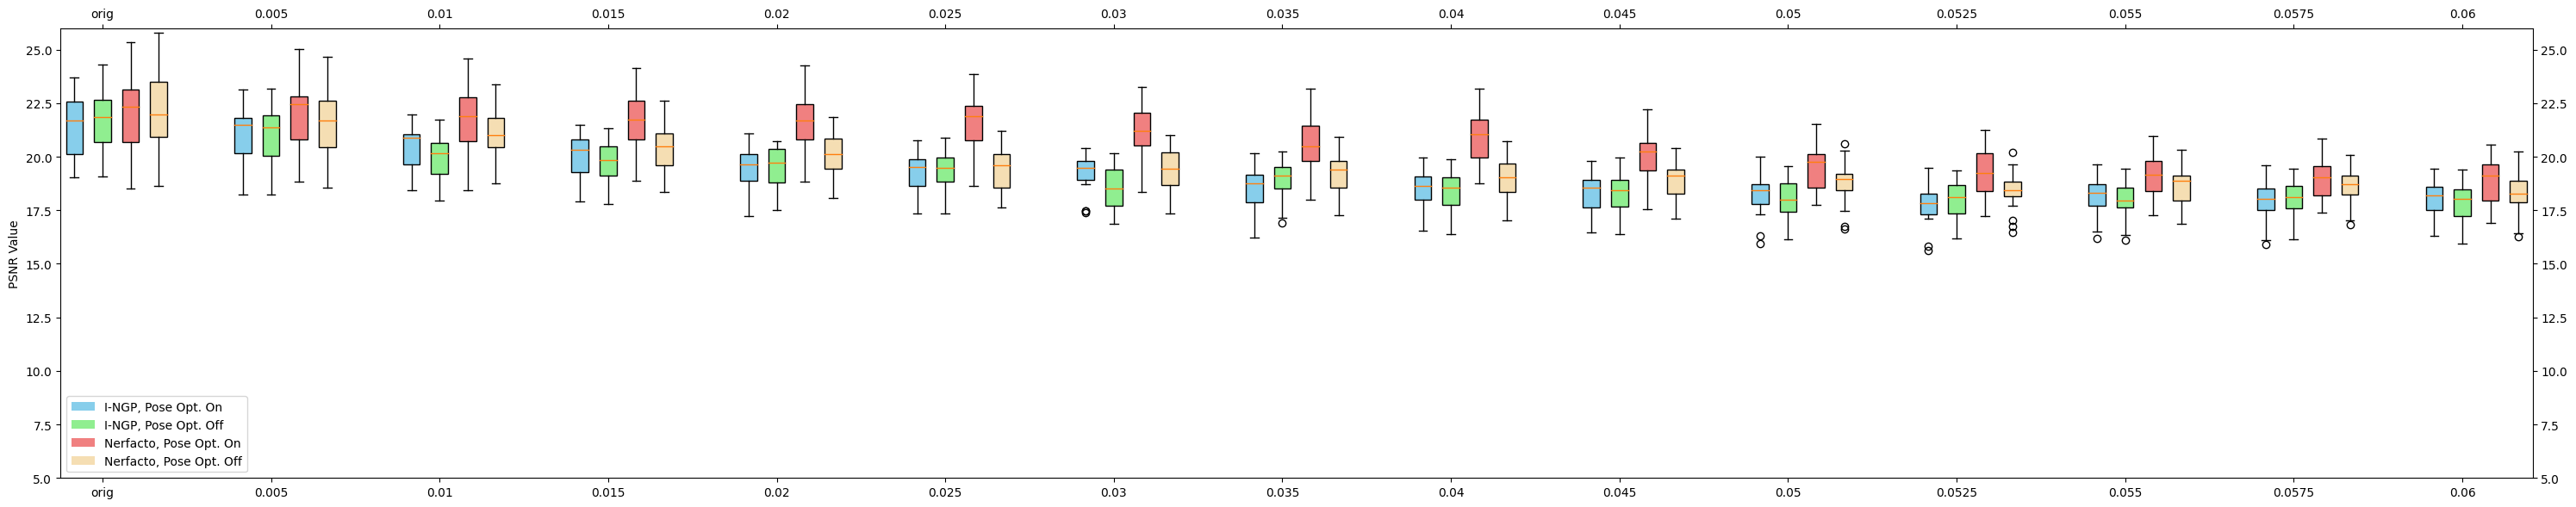

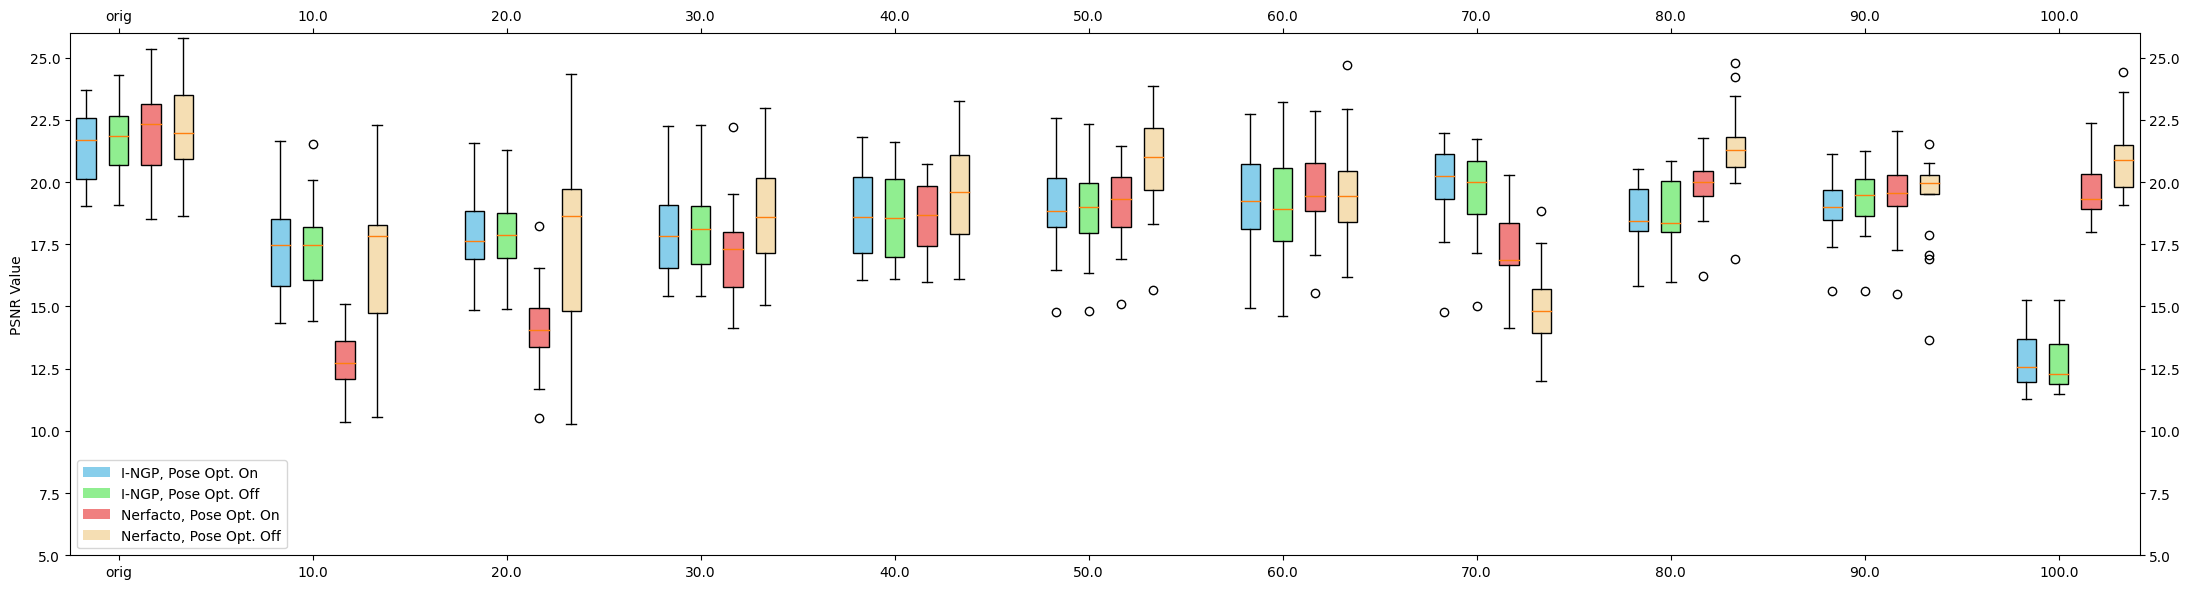

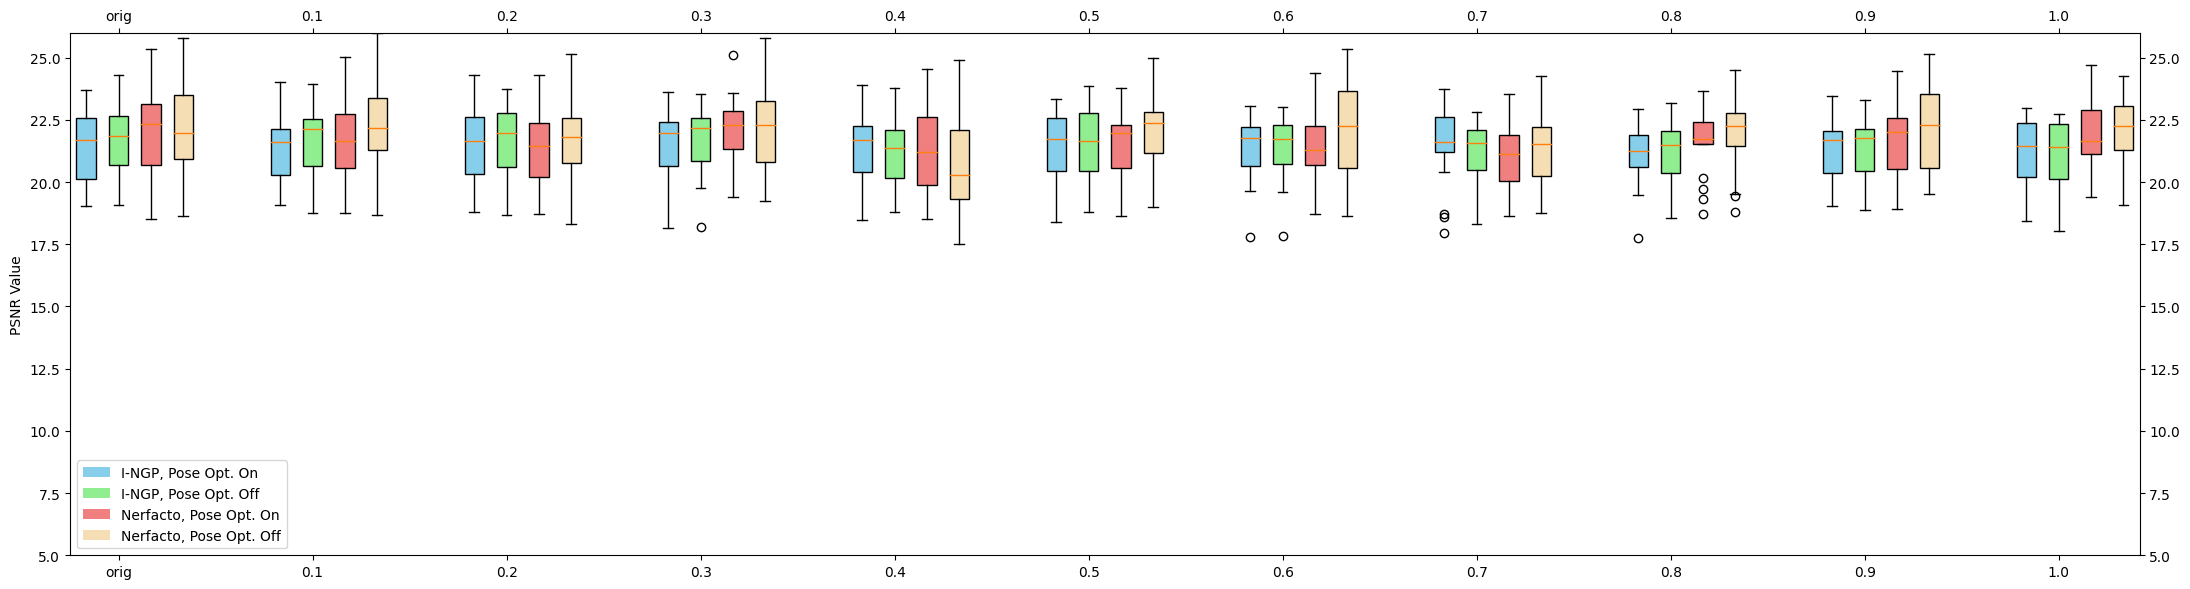

In [226]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

keys = psnr_metrics_nerfacto_off.keys()
data_to_plot = {key: [] for key in keys}
for key in keys:
    if key != 'benchmark':
        data_to_plot[key].append([
            psnr_metrics_ngp_on['benchmark'][0], 
            psnr_metrics_ngp_off['benchmark'][0], 
            psnr_metrics_nerfacto_on['benchmark'][0], 
            psnr_metrics_nerfacto_off['benchmark'][0]
        ])        
    for i in range(len(psnr_metrics_ngp_off[key])):
        if key == 'stump-saturation-std':
            print(i, len(psnr_metrics_ngp_off['stump-saturation-std']))
        data_to_plot[key].append([
            psnr_metrics_ngp_on[key][i], 
            psnr_metrics_ngp_off[key][i], 
            psnr_metrics_nerfacto_on[key][i], 
            psnr_metrics_nerfacto_off[key][i]
        ])


data_groups = 4
gap_between_groups = 2
colors = ['skyblue', 'lightgreen', 'lightcoral', 'wheat']  # Colors for each boxplot group
group_labels = ['I-NGP, Pose Opt. On', 'I-NGP, Pose Opt. Off', 'Nerfacto, Pose Opt. On', 'Nerfacto, Pose Opt. Off']  # Legend labels

for key in keys:
    num_sets = len(data_to_plot[key])
    positions = []
    for set_index in range(num_sets):
        for group_index in range(data_groups):
            position = (set_index * (data_groups + gap_between_groups)) + group_index + 1
            positions.append(position)

    plt.figure(figsize=(max(10, num_sets * 2), 6))
    
    # Creating boxplots with colors
    bp = plt.boxplot([item for sublist in data_to_plot[key] for item in sublist], 
                     positions=positions, widths=0.6, patch_artist=True)
    
    for patch, color in zip(bp['boxes'], colors * num_sets):
        patch.set_facecolor(color)
    
    # plt.title(key)
    xticks_positions = [(set_index * (data_groups + gap_between_groups)) + (data_groups / 2) 
                        for set_index in range(num_sets)]
    if key == 'benchmark':
        plt.xticks(xticks_positions, range(1, num_sets + 1))
    else:
        key = key.replace('stump-', '')
        key = key.replace('-std', '')
        key = key.replace('-percent', '')
        key = key.replace('pns-', '')
        if key == 'noise':
            key = 'noise-std'
        plt.xticks(xticks_positions, xticks[key])
    # plt.xticks(xticks_positions, range(1, num_sets + 1))


    # plt.xlabel('Set Number')
    plt.ylabel('PSNR Value')

    # Adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    plt.legend(handles=legend_elements, loc='lower left')
    
    # Adding ticks on top and right
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)

        # Setting y-axis limits to vmin and vmax
    vmin, vmax = 5, 26  # Adjust these values as needed for your data
    ax.set_ylim([vmin, vmax])
    
    save_dir = r'C:\Stuff\Results\plots\stump_psnr_combined'
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'PSNR_{key}.pdf'), format='pdf', dpi=300)
    
    plt.show()


0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10


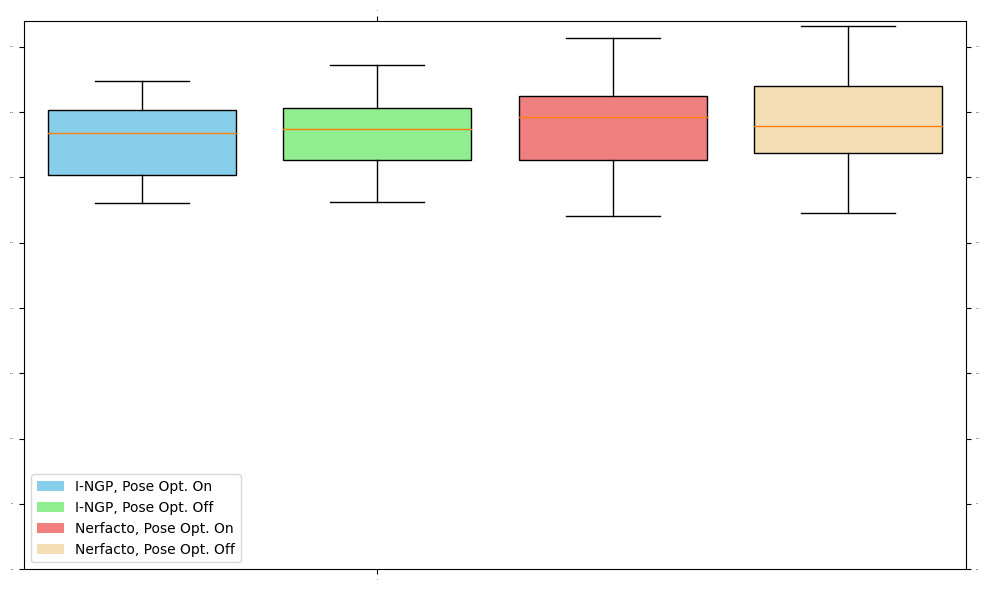

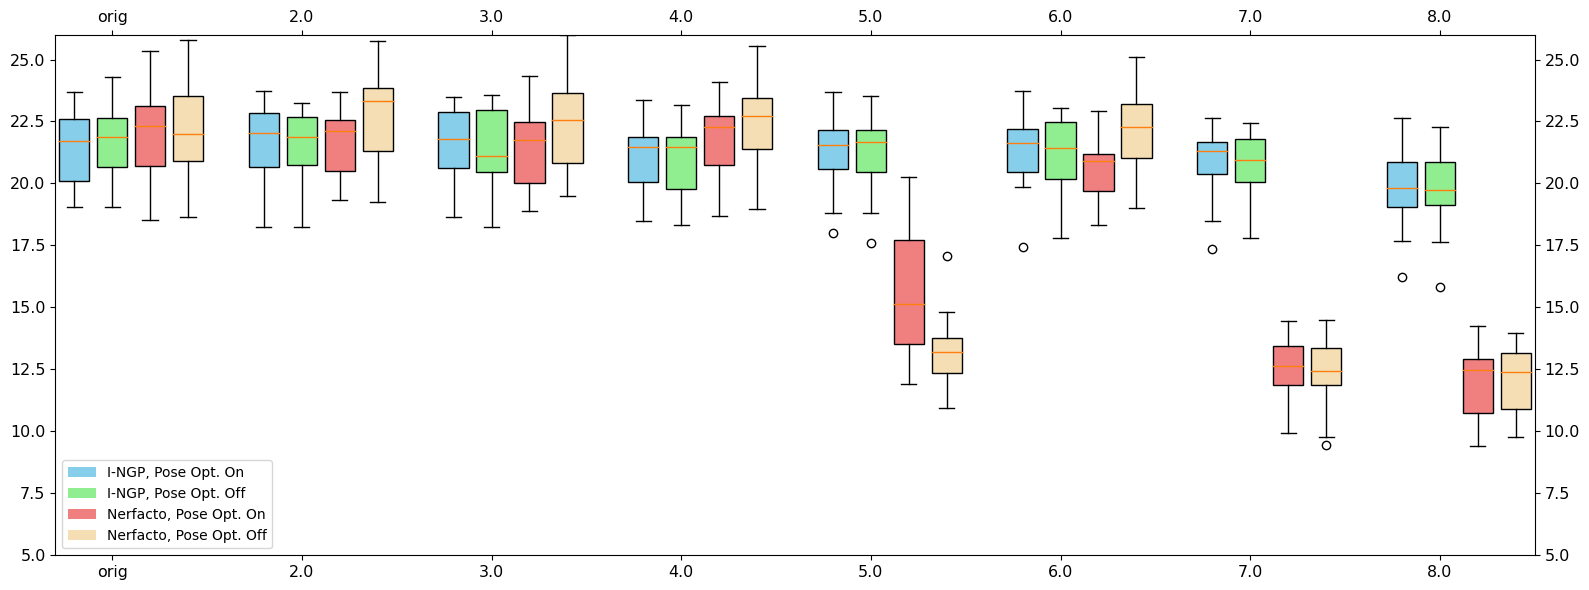

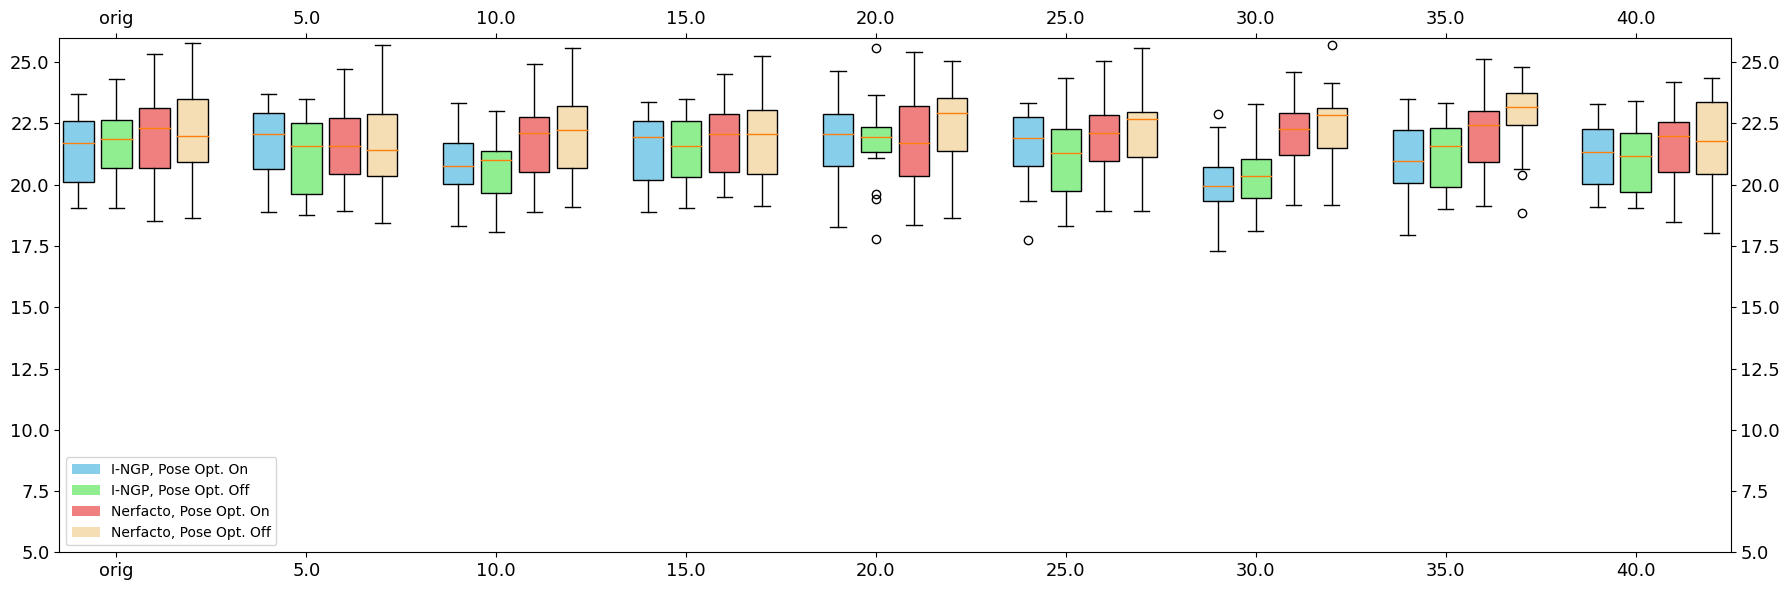

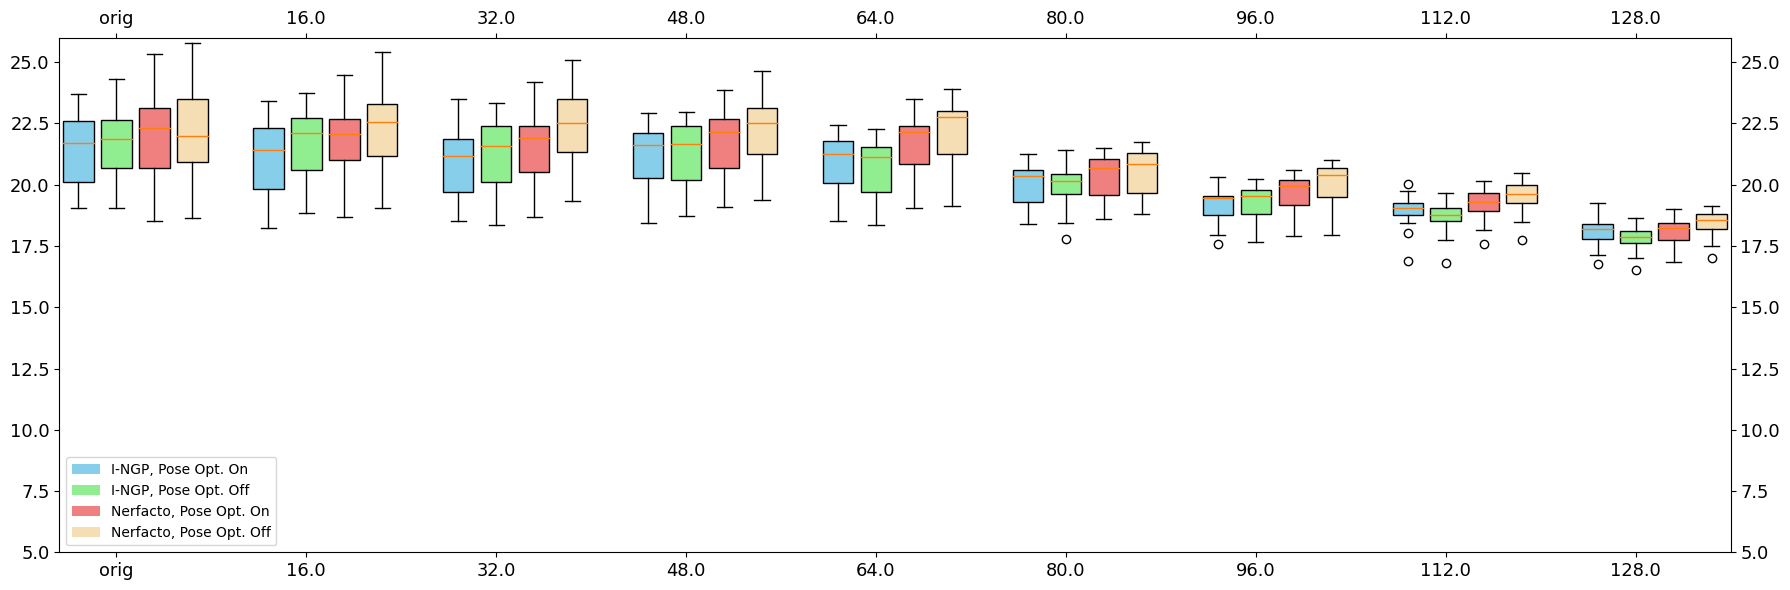

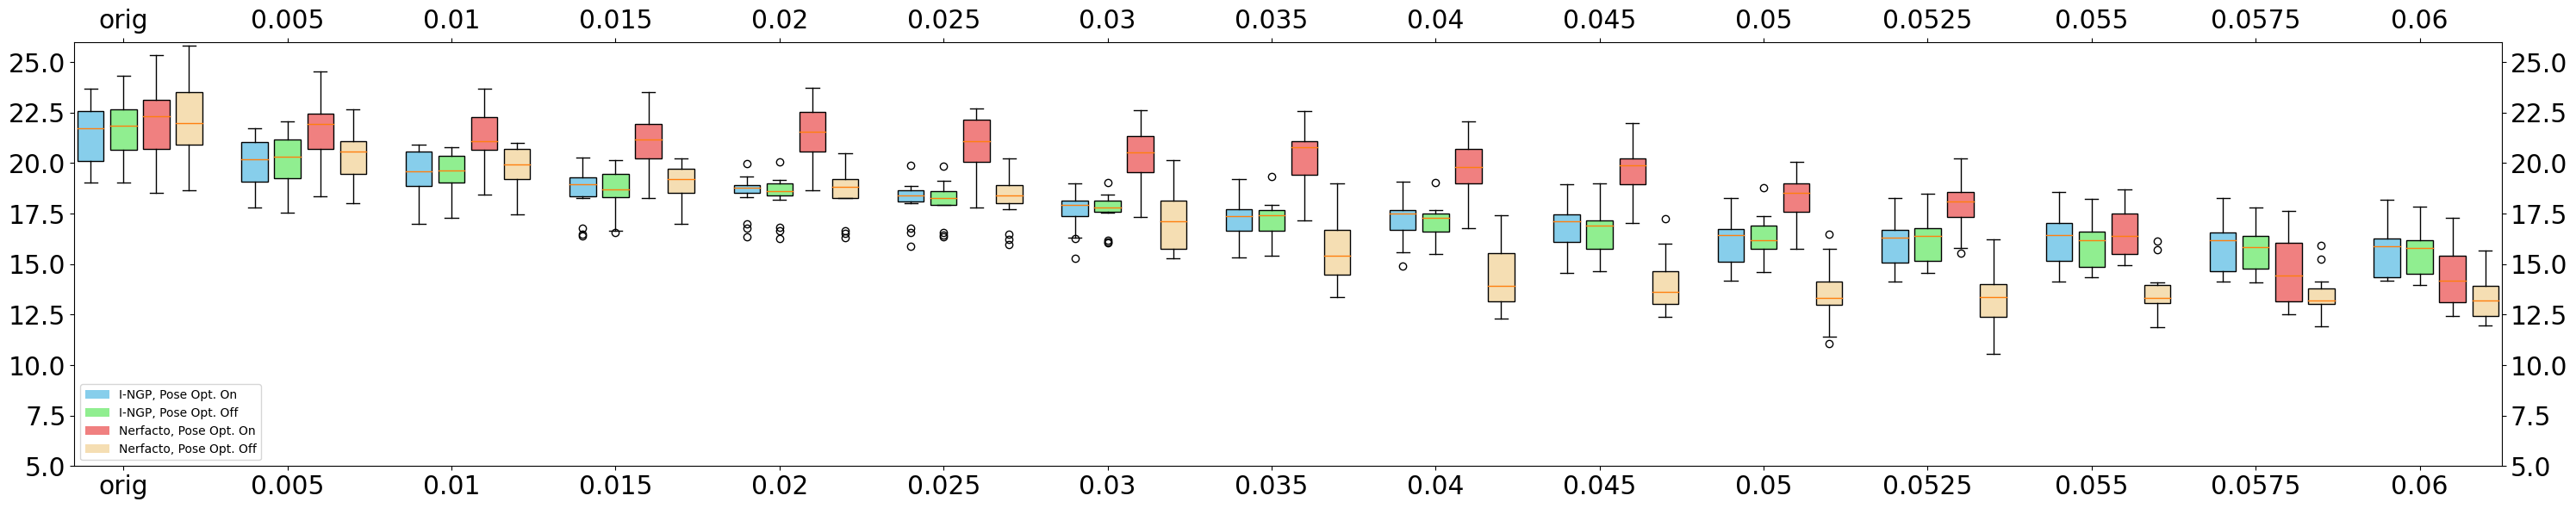

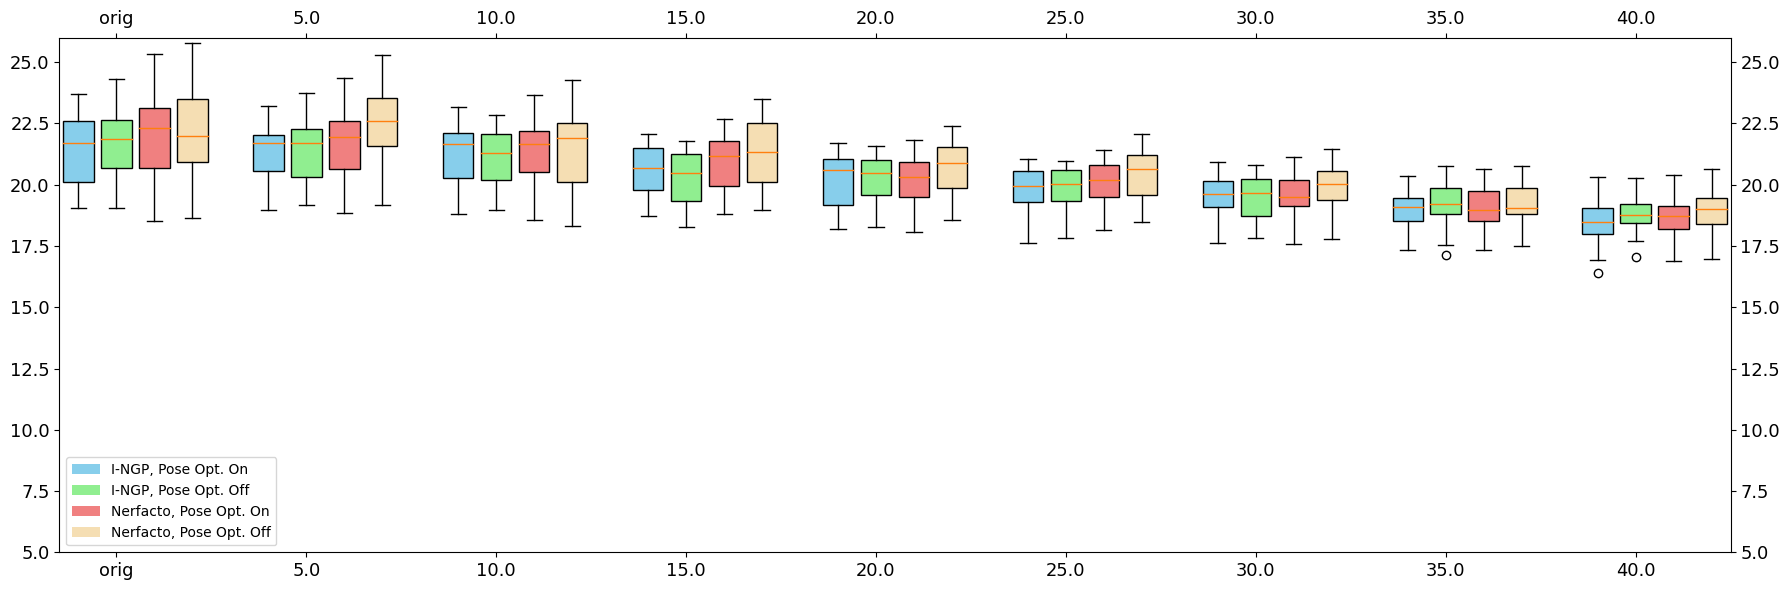

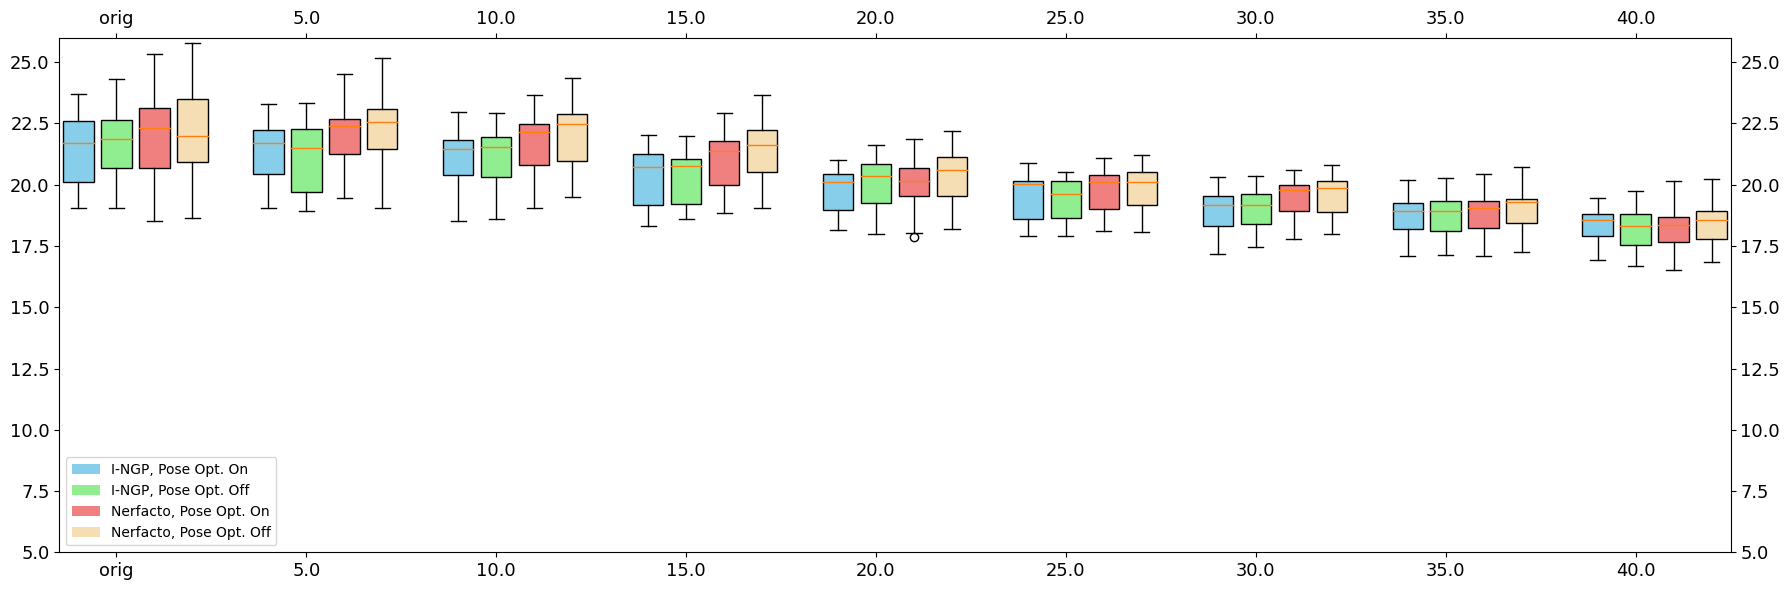

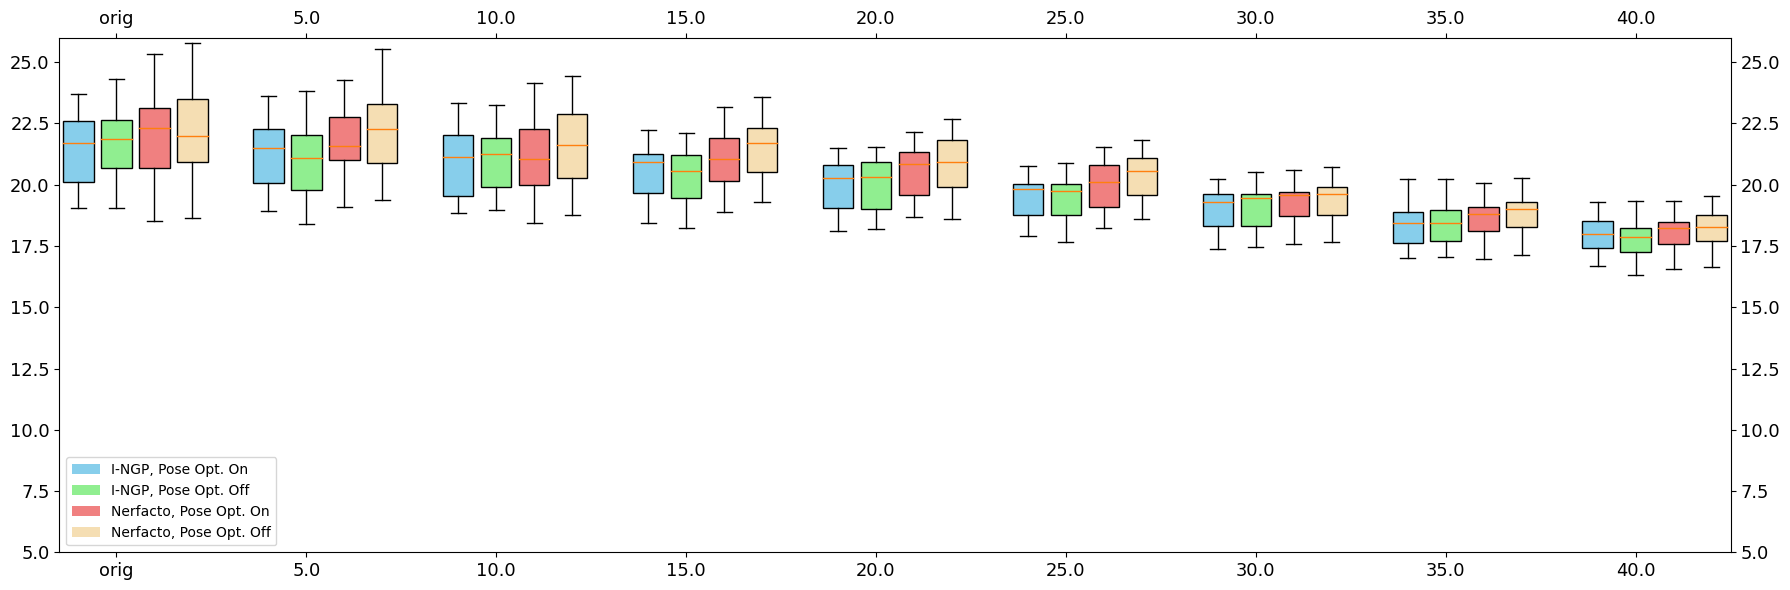

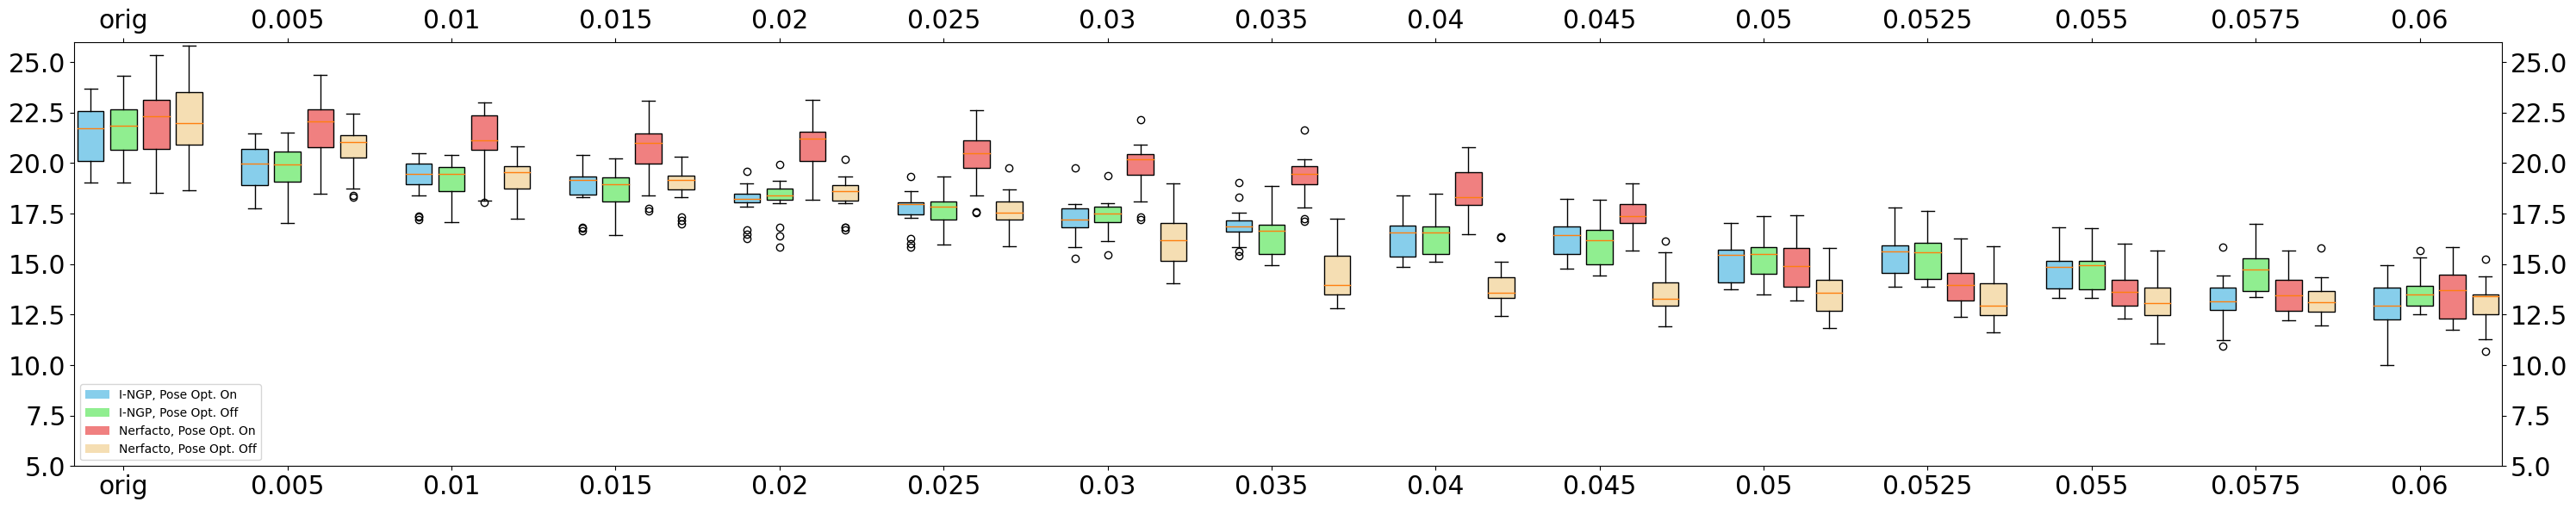

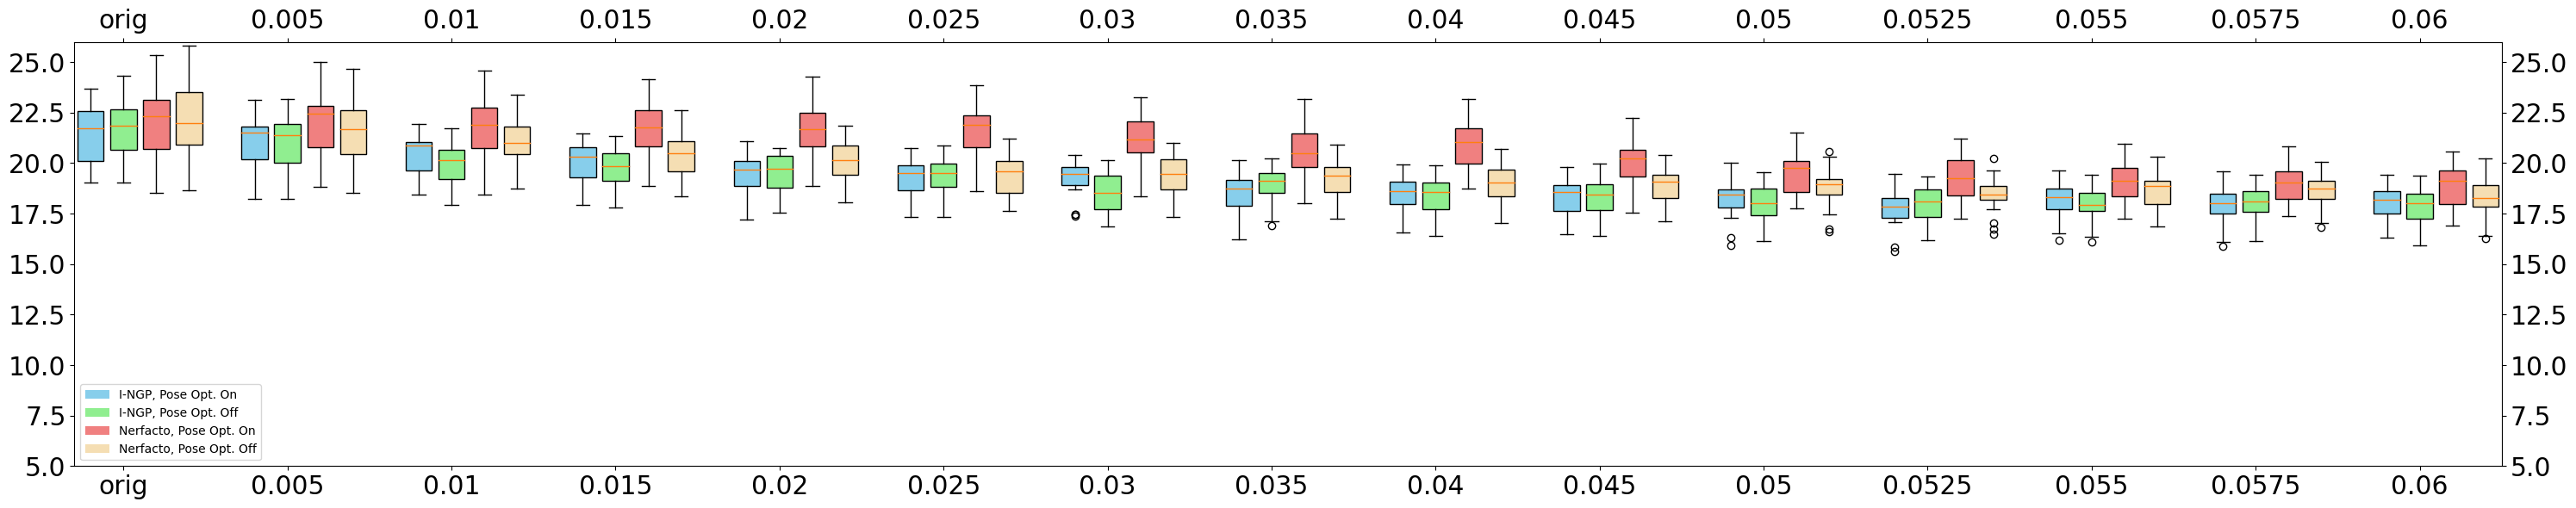

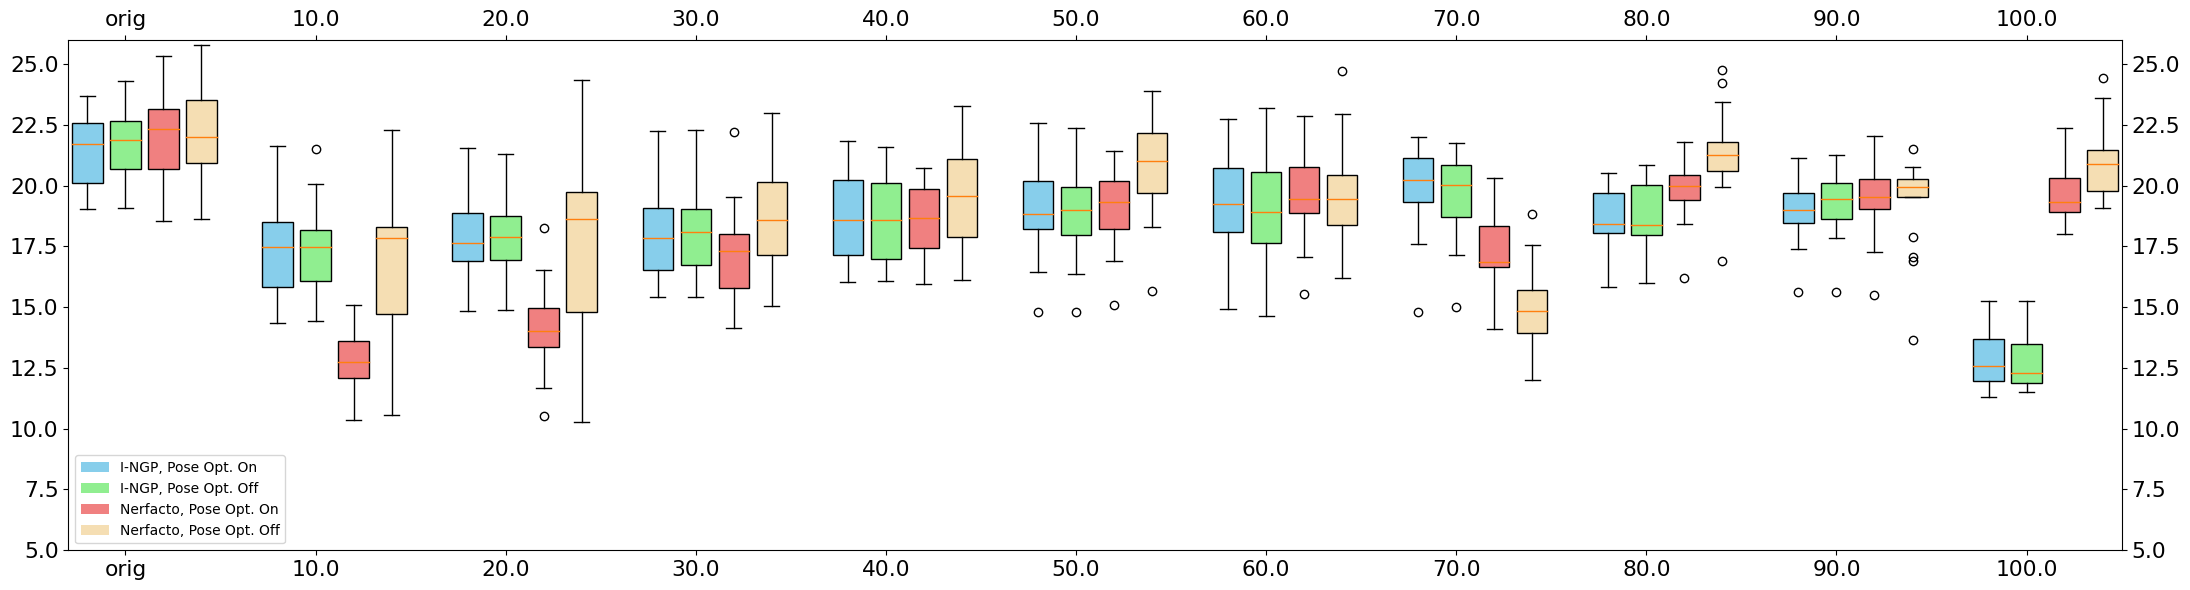

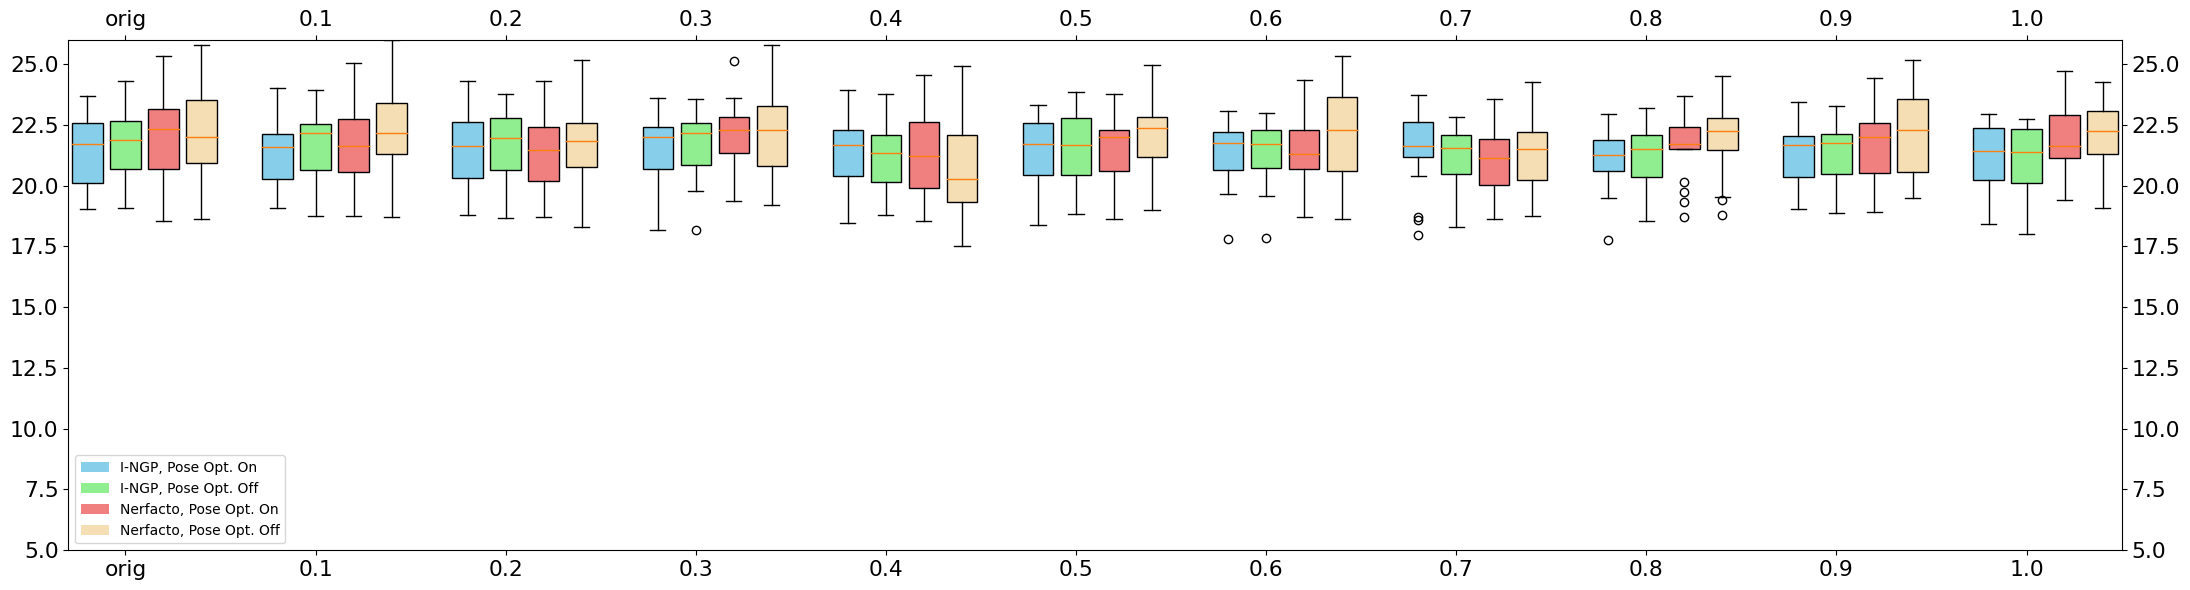

In [245]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

keys = psnr_metrics_nerfacto_off.keys()
data_to_plot = {key: [] for key in keys}
for key in keys:
    if key != 'benchmark':
        data_to_plot[key].append([
            psnr_metrics_ngp_on['benchmark'][0], 
            psnr_metrics_ngp_off['benchmark'][0], 
            psnr_metrics_nerfacto_on['benchmark'][0], 
            psnr_metrics_nerfacto_off['benchmark'][0]
        ])        
    for i in range(len(psnr_metrics_ngp_off[key])):
        if key == 'stump-saturation-std':
            print(i, len(psnr_metrics_ngp_off['stump-saturation-std']))
        data_to_plot[key].append([
            psnr_metrics_ngp_on[key][i], 
            psnr_metrics_ngp_off[key][i], 
            psnr_metrics_nerfacto_on[key][i], 
            psnr_metrics_nerfacto_off[key][i]
        ])


data_groups = 4
gap_between_groups = 1
colors = ['skyblue', 'lightgreen', 'lightcoral', 'wheat']  # Colors for each boxplot group
group_labels = ['I-NGP, Pose Opt. On', 'I-NGP, Pose Opt. Off', 'Nerfacto, Pose Opt. On', 'Nerfacto, Pose Opt. Off']  # Legend labels

for key in keys:
    num_sets = len(data_to_plot[key])
    positions = []
    for set_index in range(num_sets):
        for group_index in range(data_groups):
            position = (set_index * (data_groups + gap_between_groups)) + group_index + 1
            positions.append(position)

    plt.figure(figsize=(max(10, num_sets * 2), 6))
    
    # Creating boxplots with colors
    bp = plt.boxplot([item for sublist in data_to_plot[key] for item in sublist], 
                     positions=positions, widths=0.8, patch_artist=True)
    
    for patch, color in zip(bp['boxes'], colors * num_sets):
        patch.set_facecolor(color)
    
    fontsize = 10 * num_sets/7 # Example dynamic calculation; adjust as needed


    # plt.title(key)
    xticks_positions = [(set_index * (data_groups + gap_between_groups)) + (data_groups / 2) 
                        for set_index in range(num_sets)]
    if key == 'benchmark':
        plt.xticks(xticks_positions, range(1, num_sets + 1), fontsize = fontsize)
    else:
        key = key.replace('stump-', '')
        key = key.replace('-std', '')
        key = key.replace('-percent', '')
        key = key.replace('pns-', '')
        if key == 'noise':
            key = 'noise-std'
        plt.xticks(xticks_positions, xticks[key],fontsize=fontsize)
    # plt.xticks(xticks_positions, range(1, num_sets + 1))


    # plt.xlabel('Set Number')
    # plt.ylabel('PSNR Value')

    # Adding legend
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(colors, group_labels)]
    plt.legend(handles=legend_elements, loc='lower left')
    
    # Adding ticks on top and right
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)
    plt.yticks(fontsize=fontsize)


        # Setting y-axis limits to vmin and vmax
    vmin, vmax = 5, 26  # Adjust these values as needed for your data
    ax.set_ylim([vmin, vmax])
    
    save_dir = r'C:\Stuff\Results\plots\stump_psnr_combined'
    plt.savefig(os.path.join(save_dir, f'PSNR_{key}.pdf'), format='pdf', dpi=300)
    
    plt.tight_layout()
    plt.show()


In [159]:
xticks.keys()

dict_keys(['every', 'gamma', 'noise-std', 'orientation', 'blue-noise', 'green-noise', 'red-noise', 'pos-orient', 'position', 'range', 'saturation'])

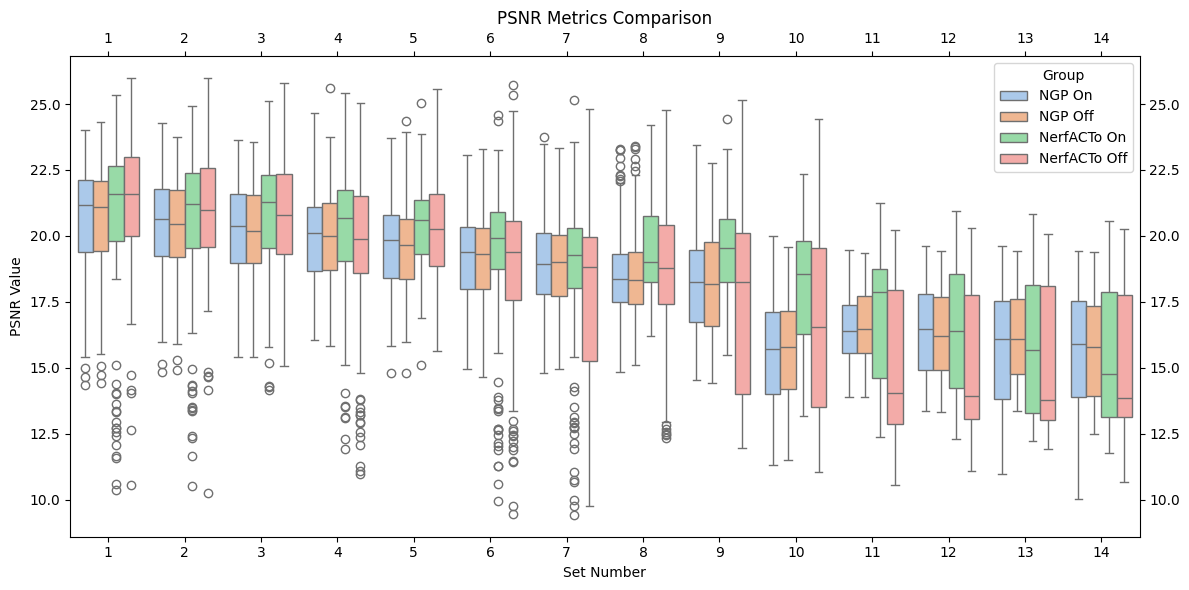

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data initialization code here

# Convert the data_to_plot dictionary to a pandas DataFrame
data_list = []
for key in keys:
    for set_index, values in enumerate(data_to_plot[key]):
        for group_index, value in enumerate(values):
            for item in value:
                data_list.append({
                    "Key": key,
                    "Set": set_index + 1,
                    "Group": group_labels[group_index],  # Assuming group_labels is defined
                    "Value": item
                })
df = pd.DataFrame(data_list)

# Now use seaborn to plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Set', y='Value', hue='Group', data=df, palette='pastel')

# Adding ticks on top and right sides of the plot
ax = plt.gca()
ax.tick_params(top=True, right=True, labeltop=True, labelright=True)

# Seaborn handles the legend automatically based on the 'hue' parameter
plt.title('PSNR Metrics Comparison')
plt.xlabel('Set Number')
plt.ylabel('PSNR Value')
plt.tight_layout()
plt.show()


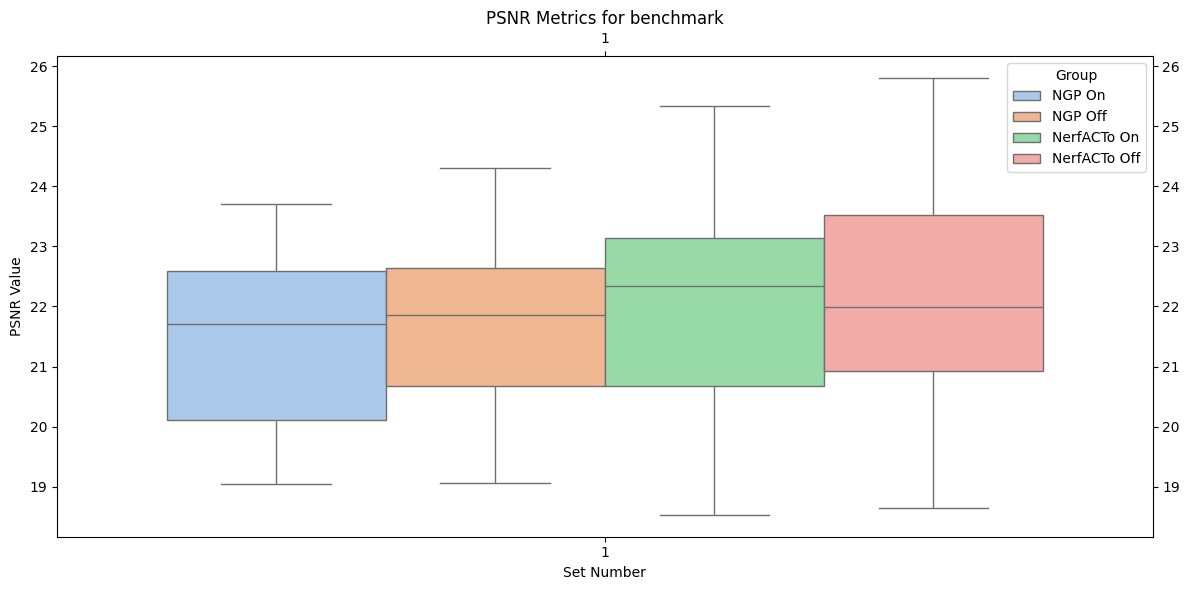

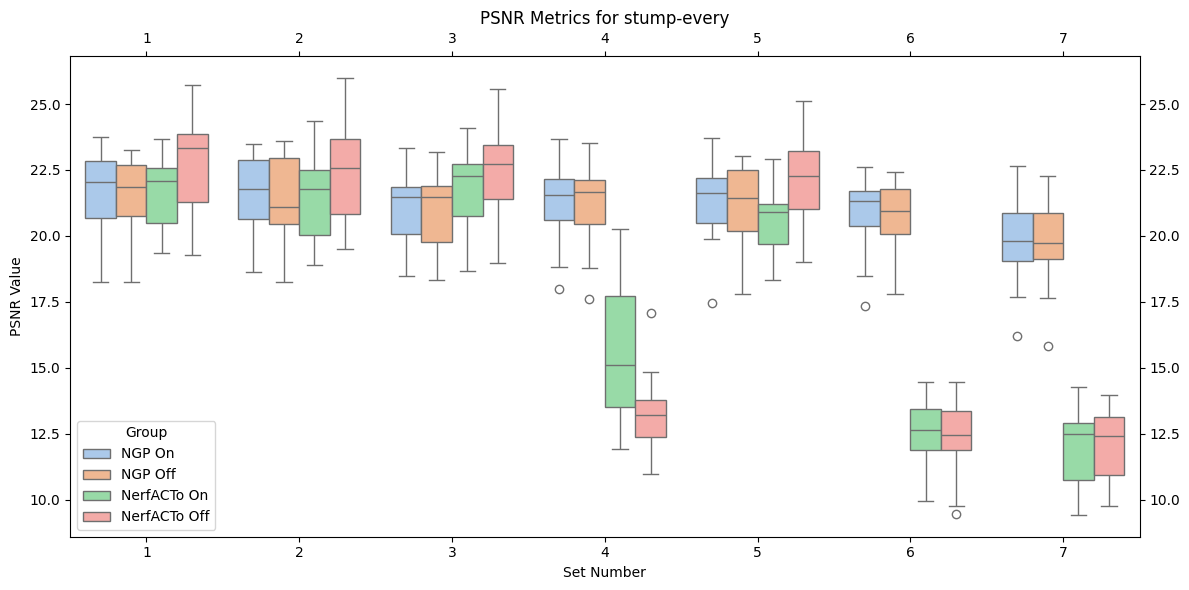

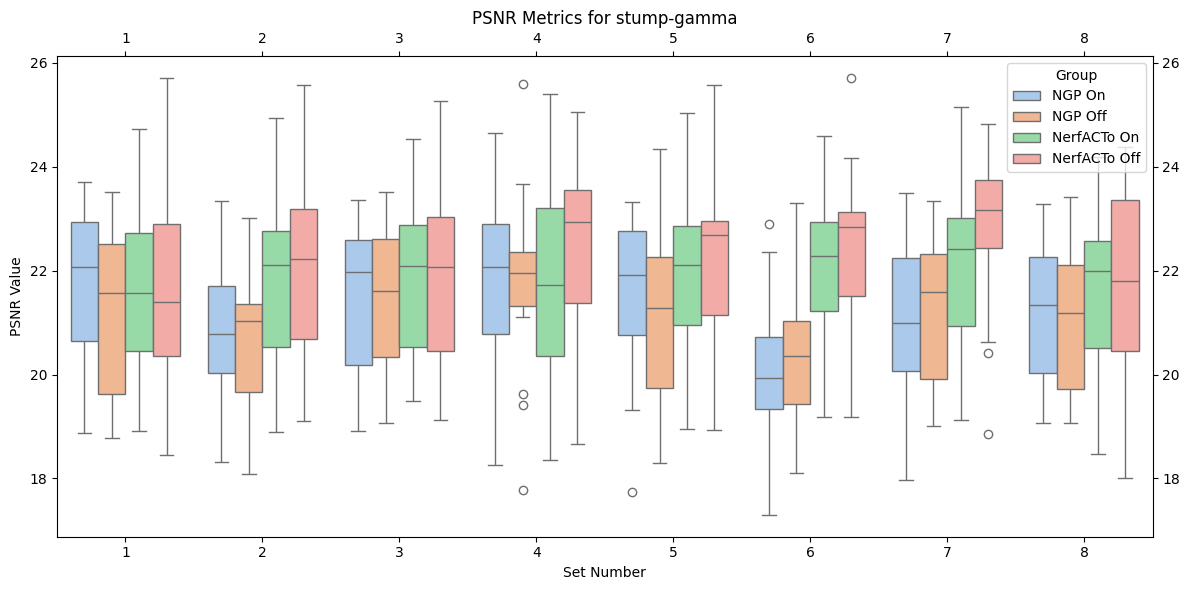

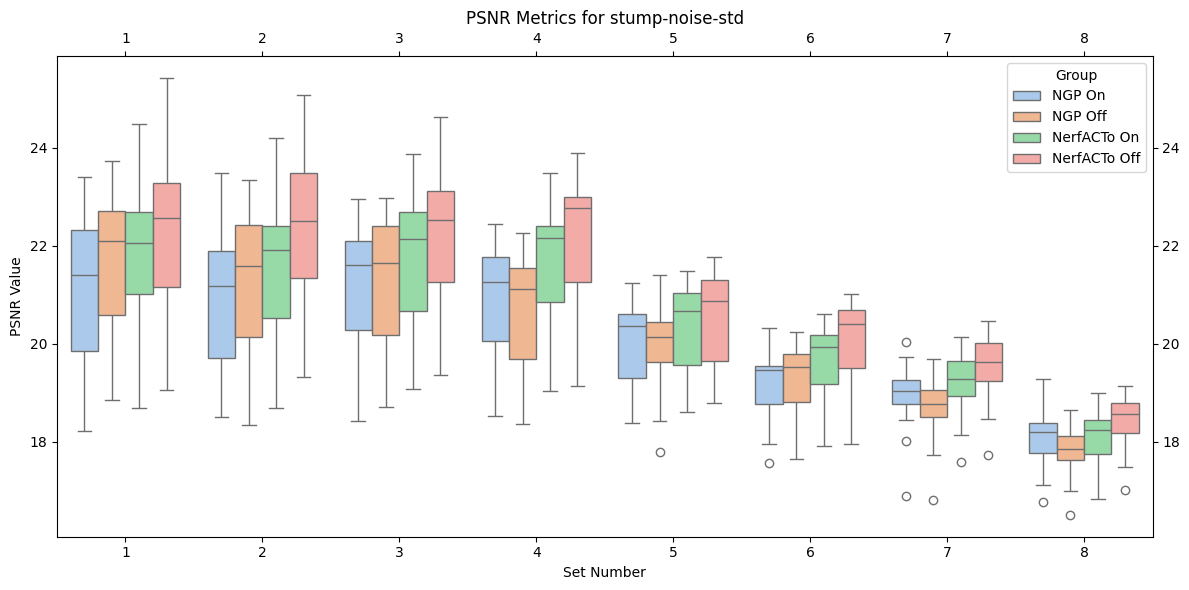

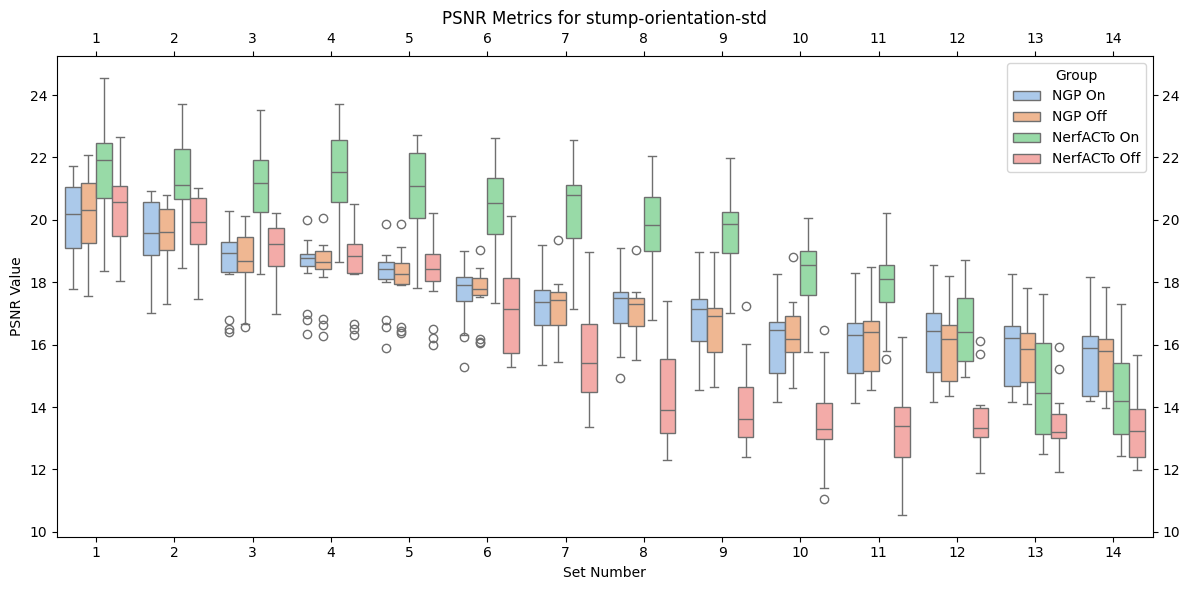

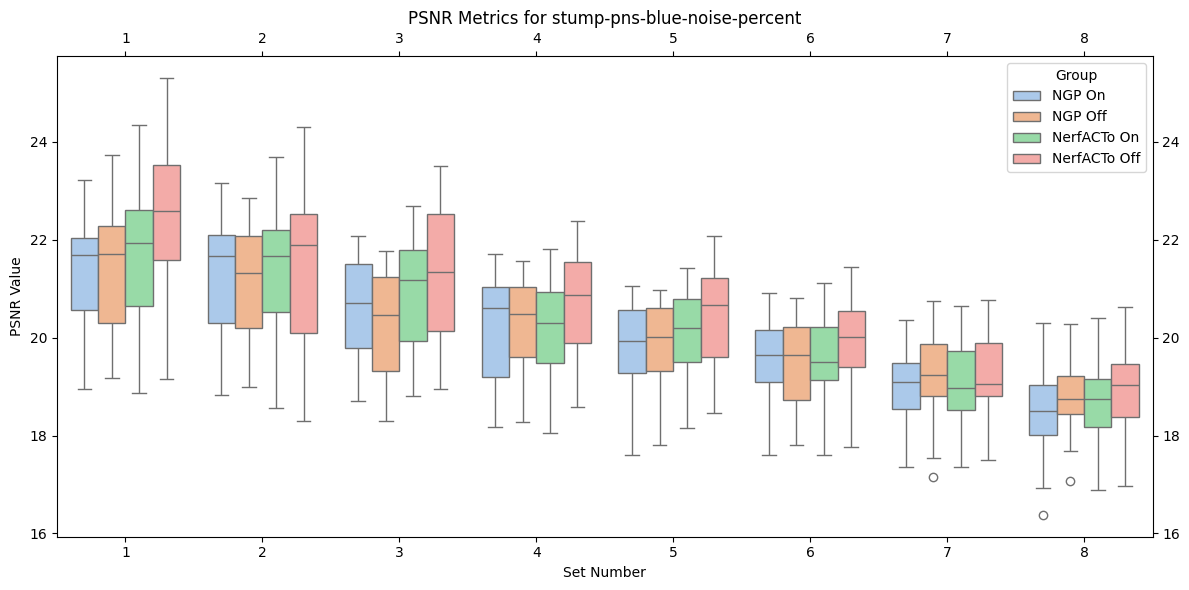

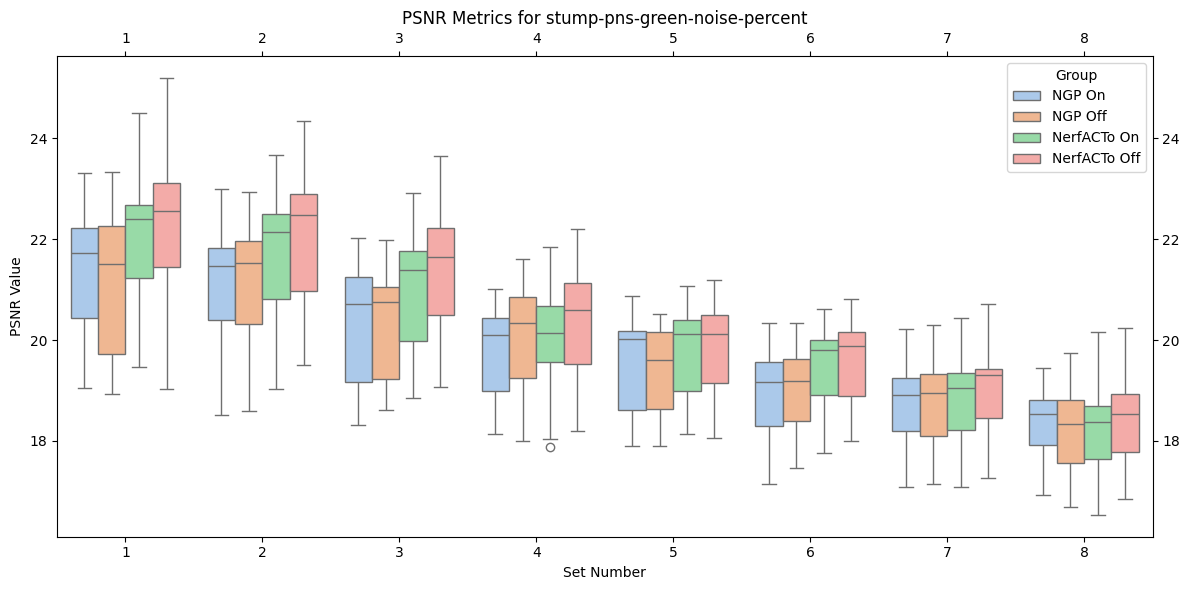

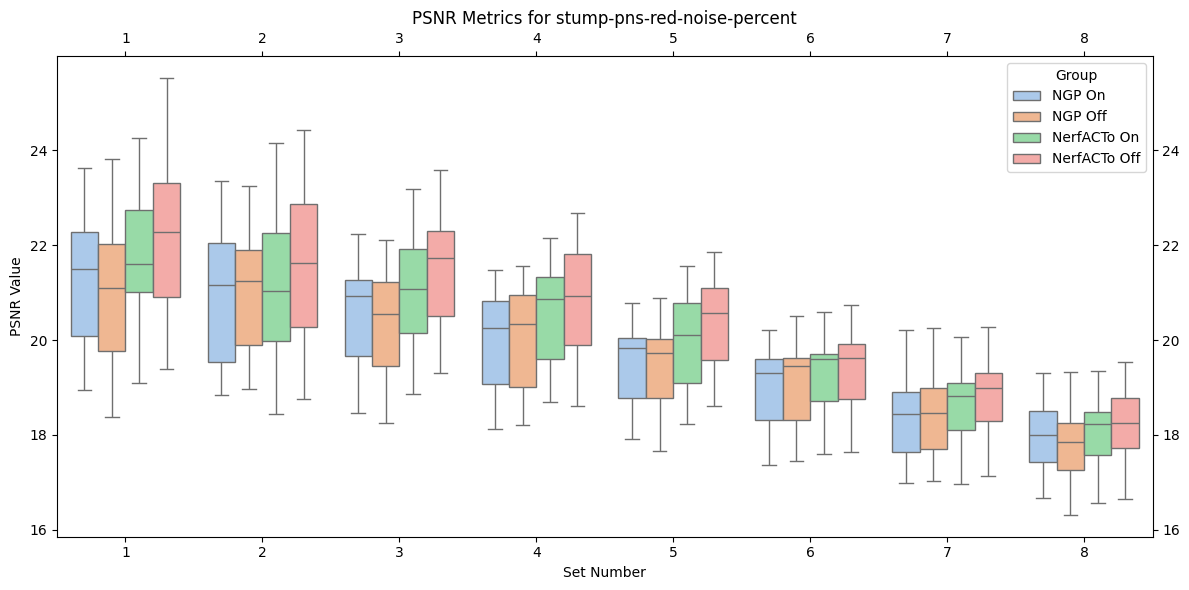

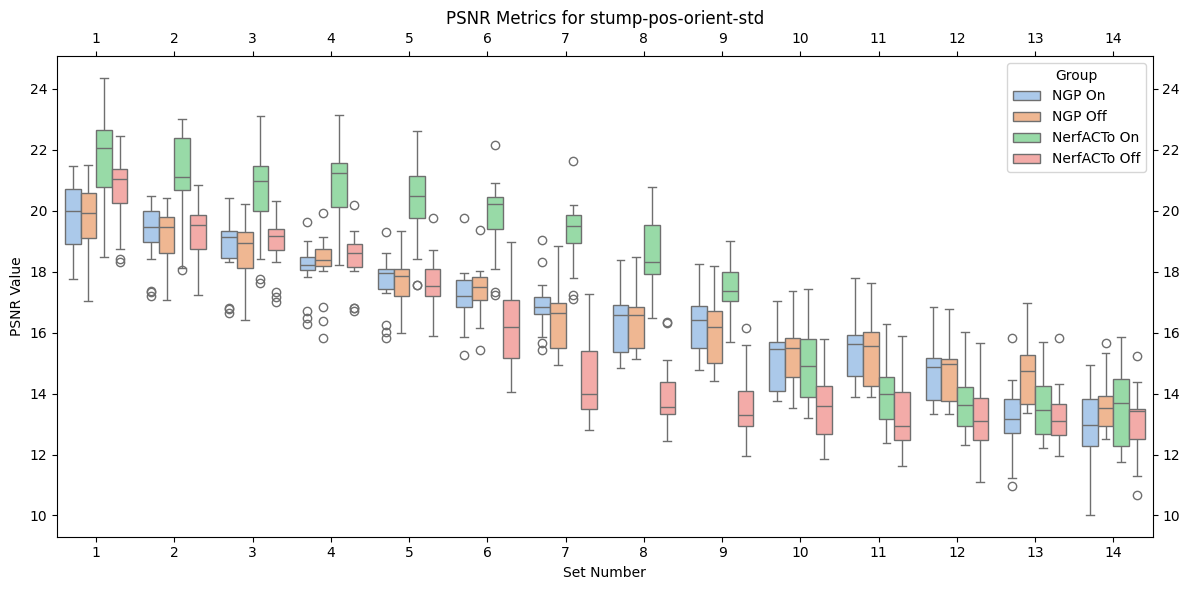

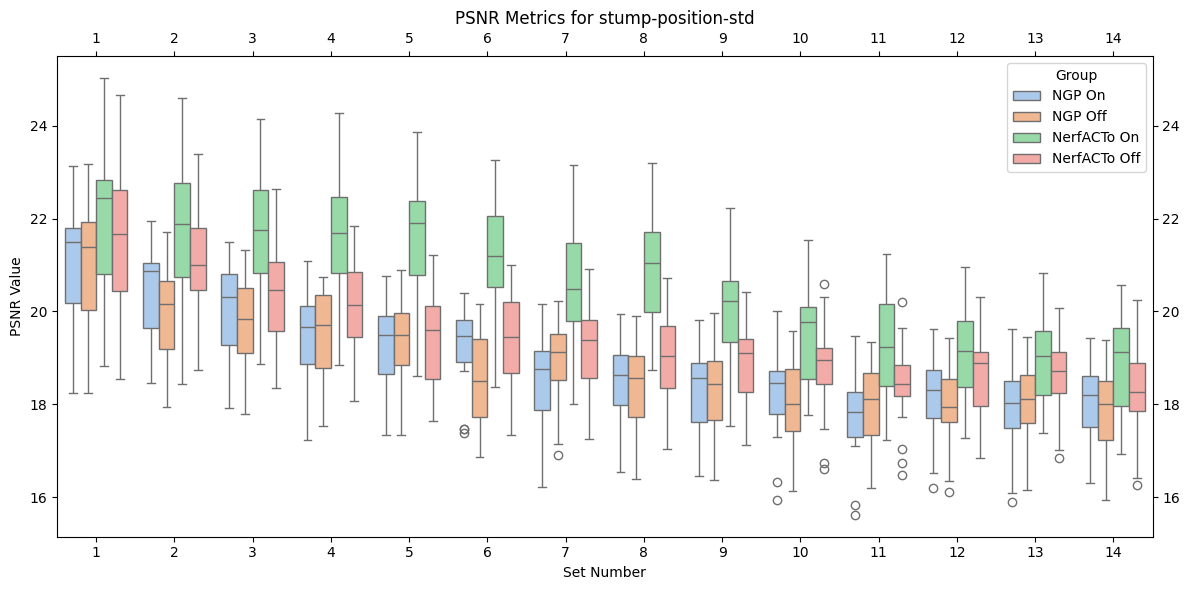

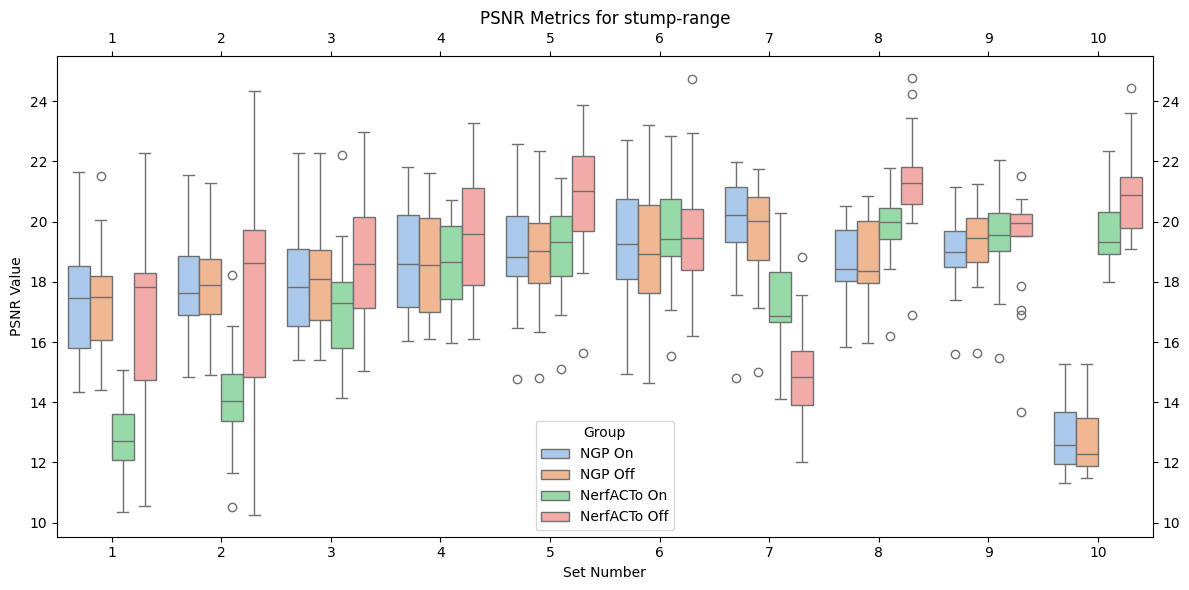

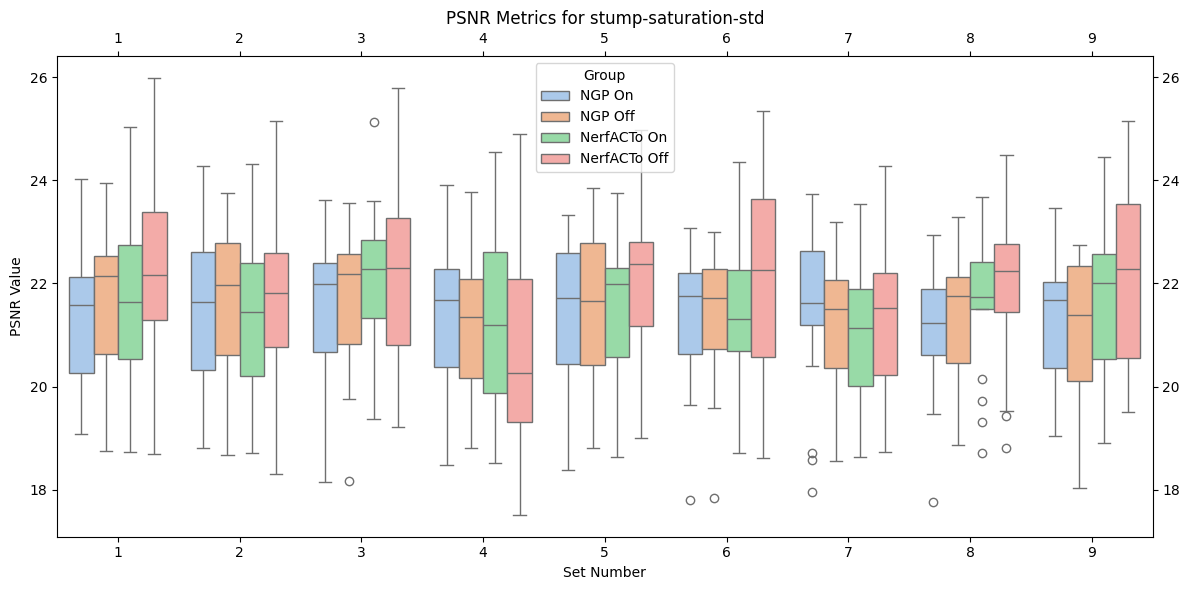

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

keys = df['Key'].unique()  # Get unique keys from the DataFrame

for key in keys:
    # Filter the DataFrame for the current key
    df_filtered = df[df['Key'] == key]
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Set', y='Value', hue='Group', data=df_filtered, palette='pastel',)
    vmin, vmax = 10, 26  # Example values, adjust according to your data needs
    ax.set_ylim([vmin, vmax])
    # Adding ticks on top and right sides of the plot
    ax = plt.gca()
    ax.tick_params(top=True, right=True, labeltop=True, labelright=True)
    
    # Optional: Remove the legend if it clutters the plot, especially if there are many keys
    # plt.legend().set_visible(False)
    
    plt.title(f'PSNR Metrics for {key}')
    plt.xlabel('Set Number')
    plt.ylabel('PSNR Value')
    plt.tight_layout()
    plt.show()


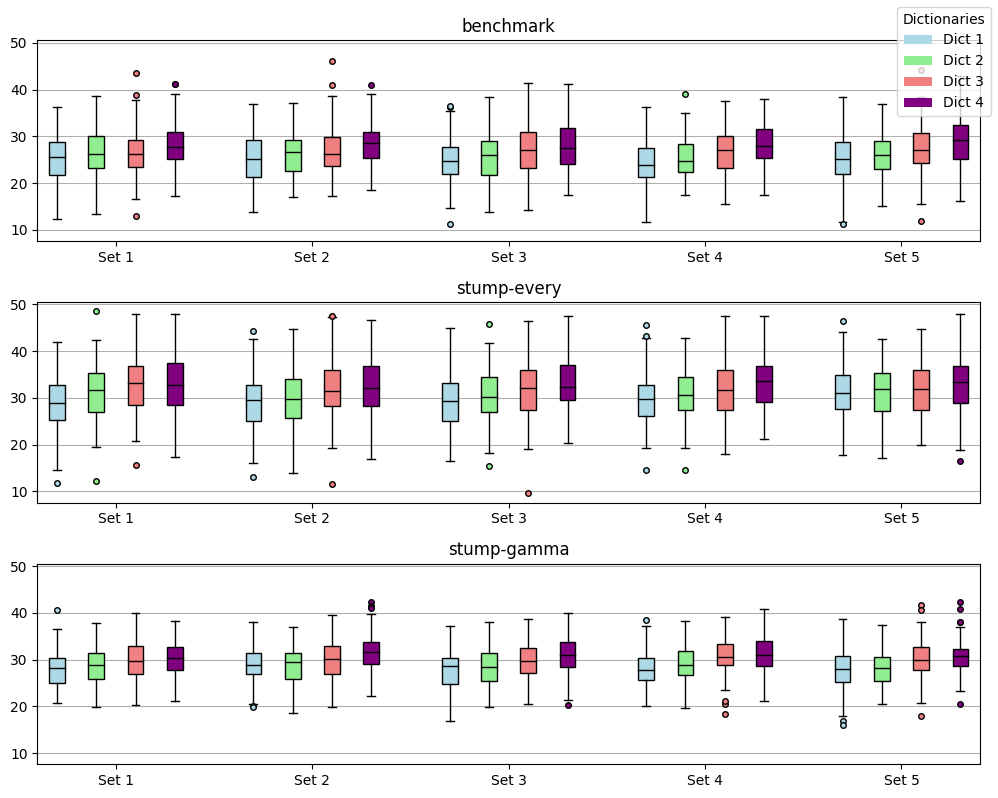

In [66]:
from matplotlib.patches import Patch  # Correcting the missing import

# Redefining the plotting section with the correct imports and approach
fig, axs = plt.subplots(len(keys), 1, figsize=(10, 8), sharey=True)
colors = ['lightblue', 'lightgreen', 'lightcoral', 'purple']
dict_labels = ['Dict 1', 'Dict 2', 'Dict 3', 'Dict 4']

for i, key in enumerate(keys):
    for dict_index, color in enumerate(colors):
        data_for_dict = [data_set[dict_index] for data_set in data_to_plot[key]]
        positions = [1 + 5 * x + dict_index for x in range(len(data_to_plot[key]))]
        
        boxprops = dict(facecolor=color, color="black")
        whiskerprops = dict(color='black')
        capprops = dict(color='black')
        medianprops = dict(color="black")
        flierprops = dict(markerfacecolor=color, marker='o', markersize=4)
        
        axs[i].boxplot(data_for_dict, positions=positions, patch_artist=True, 
                       boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, 
                       medianprops=medianprops, flierprops=flierprops, widths=0.4)
        # axs[i].set_facecolor(color)
    
    axs[i].set_title(key)
    axs[i].set_xticks([2.5 + 5 * x for x in range(len(data_to_plot[key]))])
    axs[i].set_xticklabels(['Set 1', 'Set 2', 'Set 3', 'Set 4', 'Set 5'])
    axs[i].grid(True, axis='y')

patch_list = [Patch(facecolor=color, label=label) for color, label in zip(colors, dict_labels)]
fig.legend(handles=patch_list, loc='upper right', title="Dictionaries")

plt.tight_layout()
plt.show()


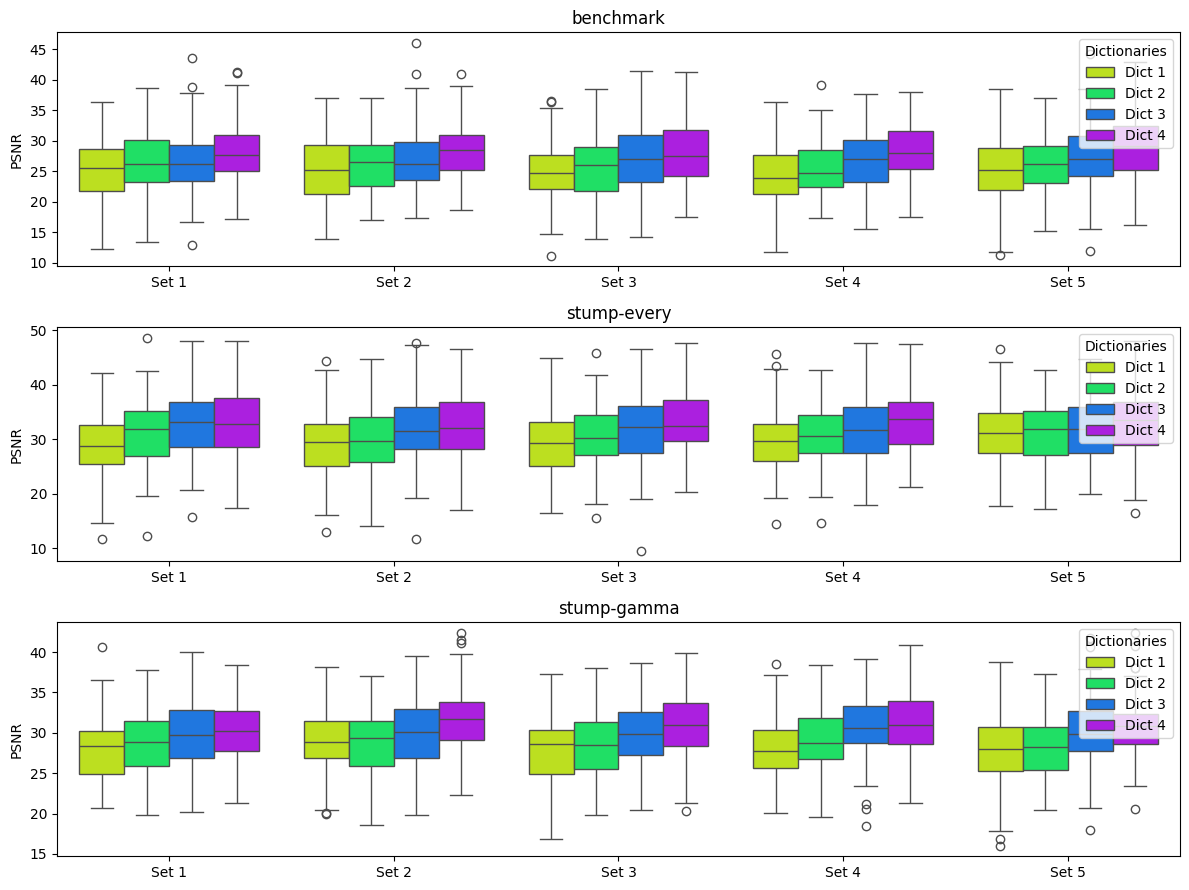

In [42]:
# We will adjust the plotting strategy to ensure that labels are grouped more clearly by set and dictionary
palette = sns.color_palette("hsv", 4)
# Creating a new DataFrame to hold the data for easier plotting with seaborn
import pandas as pd

# Preparing data for DataFrame
data_list = []
for key in keys:
    for dict_index, (dict_label, color) in enumerate(zip(dict_labels, colors)):
        for set_index, data_set in enumerate(data_to_plot[key]):
            for score in data_set[dict_index]:
                data_list.append({'Condition': key, 'Dictionary': dict_label, 'Set': f'Set {set_index+1}', 'PSNR': score})

# Creating DataFrame
df = pd.DataFrame(data_list)

# Plotting using seaborn with clearer grouping
plt.figure(figsize=(12, 9))

# We will plot one condition at a time to ensure grouping is clear
for i, condition in enumerate(df['Condition'].unique()):
    plt.subplot(len(keys), 1, i+1)
    sns.boxplot(x='Set', y='PSNR', hue='Dictionary', data=df[df['Condition'] == condition], palette=palette)
    plt.title(condition)
    plt.xlabel('')
    plt.ylabel('PSNR')
    plt.legend(title='Dictionaries', loc='upper right')

plt.tight_layout()
plt.show()


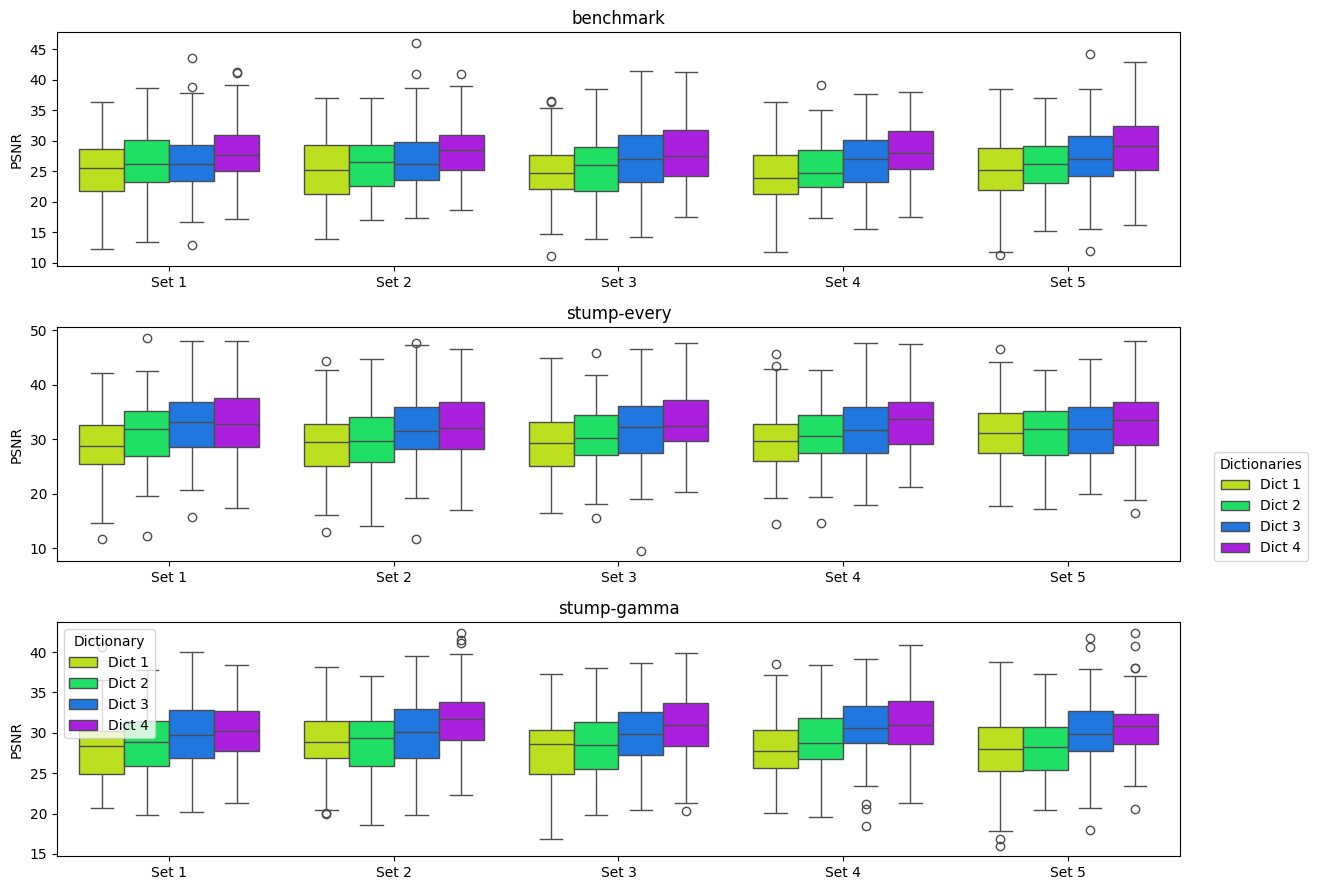

In [45]:
# To avoid repeating the legend in each subplot, we'll add a single legend outside the subplots.

plt.figure(figsize=(12, 9))

for i, condition in enumerate(df['Condition'].unique()):
    ax = plt.subplot(len(keys), 1, i+1)
    sns.boxplot(x='Set', y='PSNR', hue='Dictionary', data=df[df['Condition'] == condition], palette=palette)
    plt.title(condition)
    plt.xlabel('')
    plt.ylabel('PSNR')
    # Removing the legend from all but the last plot
    if i < len(df['Condition'].unique()) - 1:
        ax.get_legend().remove()

# Adding a single legend outside of the subplots
handles, labels = ax.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper right', title='Dictionaries', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()


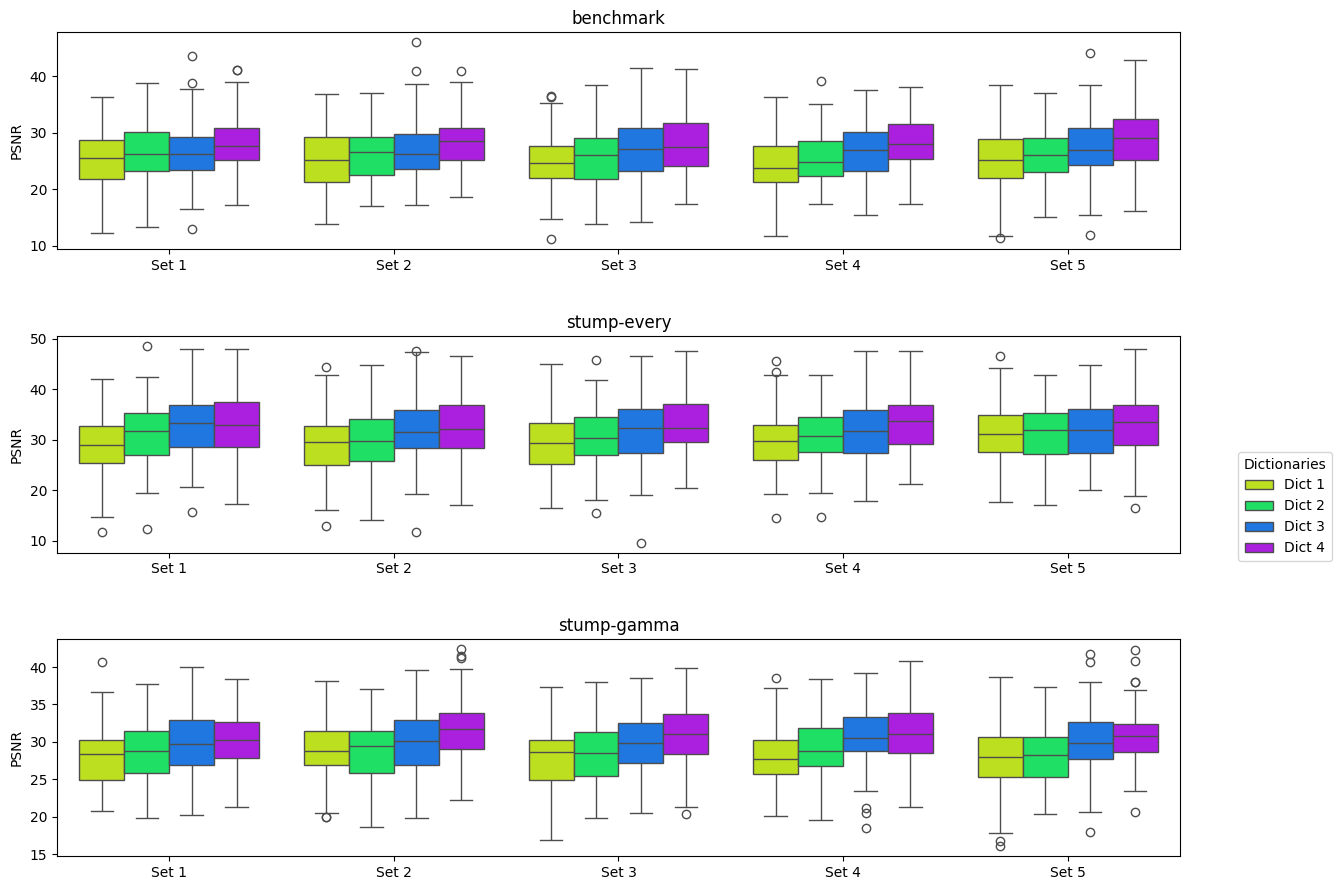

In [46]:
# To add horizontal space between the boxplots for each dictionary within a set, we adjust the 'dodge' parameter and customize further if needed.

plt.figure(figsize=(12, 9))

# Increase dodge value to add more horizontal space between the boxes of each dictionary within a set
dodge_value = 0.3  # Adjust this value as needed to increase/decrease space

for i, condition in enumerate(df['Condition'].unique()):
    ax = plt.subplot(len(keys), 1, i+1)
    sns.boxplot(x='Set', y='PSNR', hue='Dictionary', data=df[df['Condition'] == condition], palette=palette, dodge=dodge_value)
    plt.title(condition)
    plt.xlabel('')
    plt.ylabel('PSNR')
    ax.get_legend().remove()

# Adding a single consolidated legend outside of the subplots
plt.figlegend(handles, labels, loc='upper right', title='Dictionaries', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)  # Adjust vertical space between plots if necessary

plt.show()
